In [1]:
from src.utils import read_files_kpi2d, read_file_kpi3d, plot_kpi2d, plot_kpi3d

In [2]:
file_path = '/home/k64889/Masters-Thesis/data/Testing/raw/738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitched_029_000004.xlsx'

Plot Exploration of a 2d KPI - Mgrenz

In [3]:
nn_kpi2d, mgrenz_kpi2d = read_files_kpi2d(file_path, 'Mgrenz')

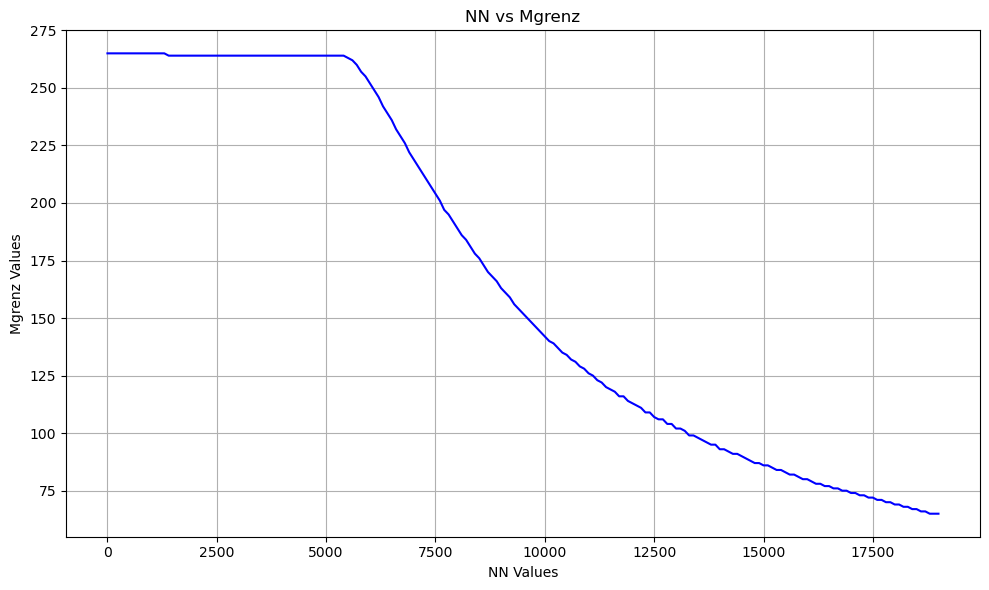

In [4]:
plot_kpi2d(nn_kpi2d, mgrenz_kpi2d)

Plot Exploration of a 3d KPI -ETA

In [5]:
nn_kpi3d = read_file_kpi3d(file_path, 'NN')
mm_kpi3d = read_file_kpi3d(file_path, 'MM')
eta_kpi3d = read_file_kpi3d(file_path, 'ETA')

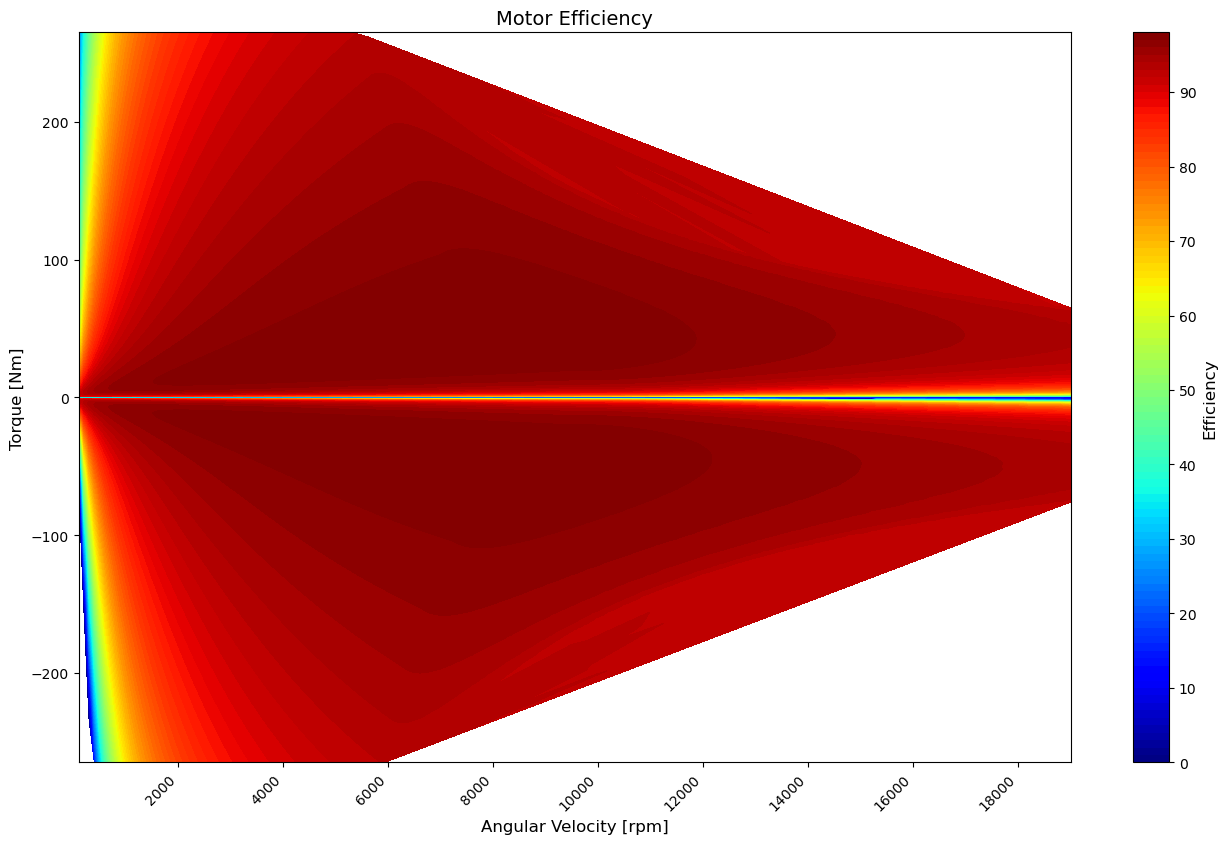

In [6]:
plot_kpi3d(nn_kpi3d, mm_kpi3d, eta_kpi3d)

In [7]:
nn=nn_kpi3d
mm=mm_kpi3d
eta=eta_kpi3d

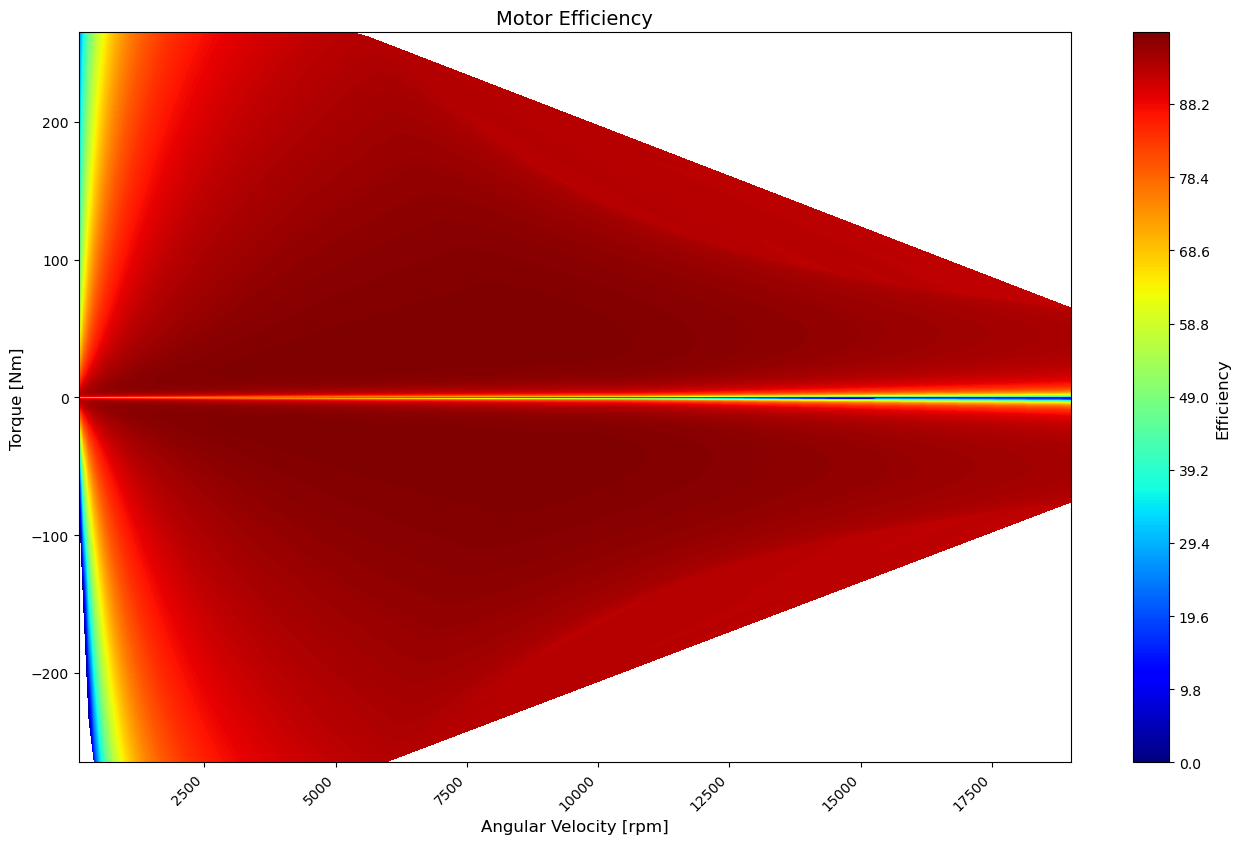

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patheffects
import matplotlib.colors as mcolors
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))

# # Remove the first row and column if headers
X = nn[0, 1:]
Y = mm[1:, 0]
Z = eta[1:, 1:]

# X = nn
# Y = mm
# Z = eta[1:, 1:]

gamma=90.5##Doesnt seem to do the power law distribution trick

norm = mcolors.PowerNorm(gamma=gamma, vmin=0, vmax=100)

X, Y = np.meshgrid(X, Y)#Array of combination of values between X and Y for plotting Z

mask = np.isfinite(Z)#Removes NaN values before plotting
X, Y, Z = X[mask], Y[mask], Z[mask]

contour = ax.tricontourf(X.ravel(), Y.ravel(), Z.ravel(), levels=500, cmap='jet')

ax.set_xlabel('Angular Velocity [rpm]', fontsize=12)
ax.set_ylabel('Torque [Nm]', fontsize=12)
ax.set_title('Motor Efficiency', fontsize=14)

cbar = fig.colorbar(contour)
cbar.set_label('Efficiency', fontsize=12)

# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

plt.show()

In [10]:
mm1=mm_kpi3d
mm2=mm_kpi3d
eta1=eta_kpi3d
eta2=eta_kpi3d

/tmp/ipykernel_1604340/3327107365.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')
/tmp/ipykernel_1604340/3327107365.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')


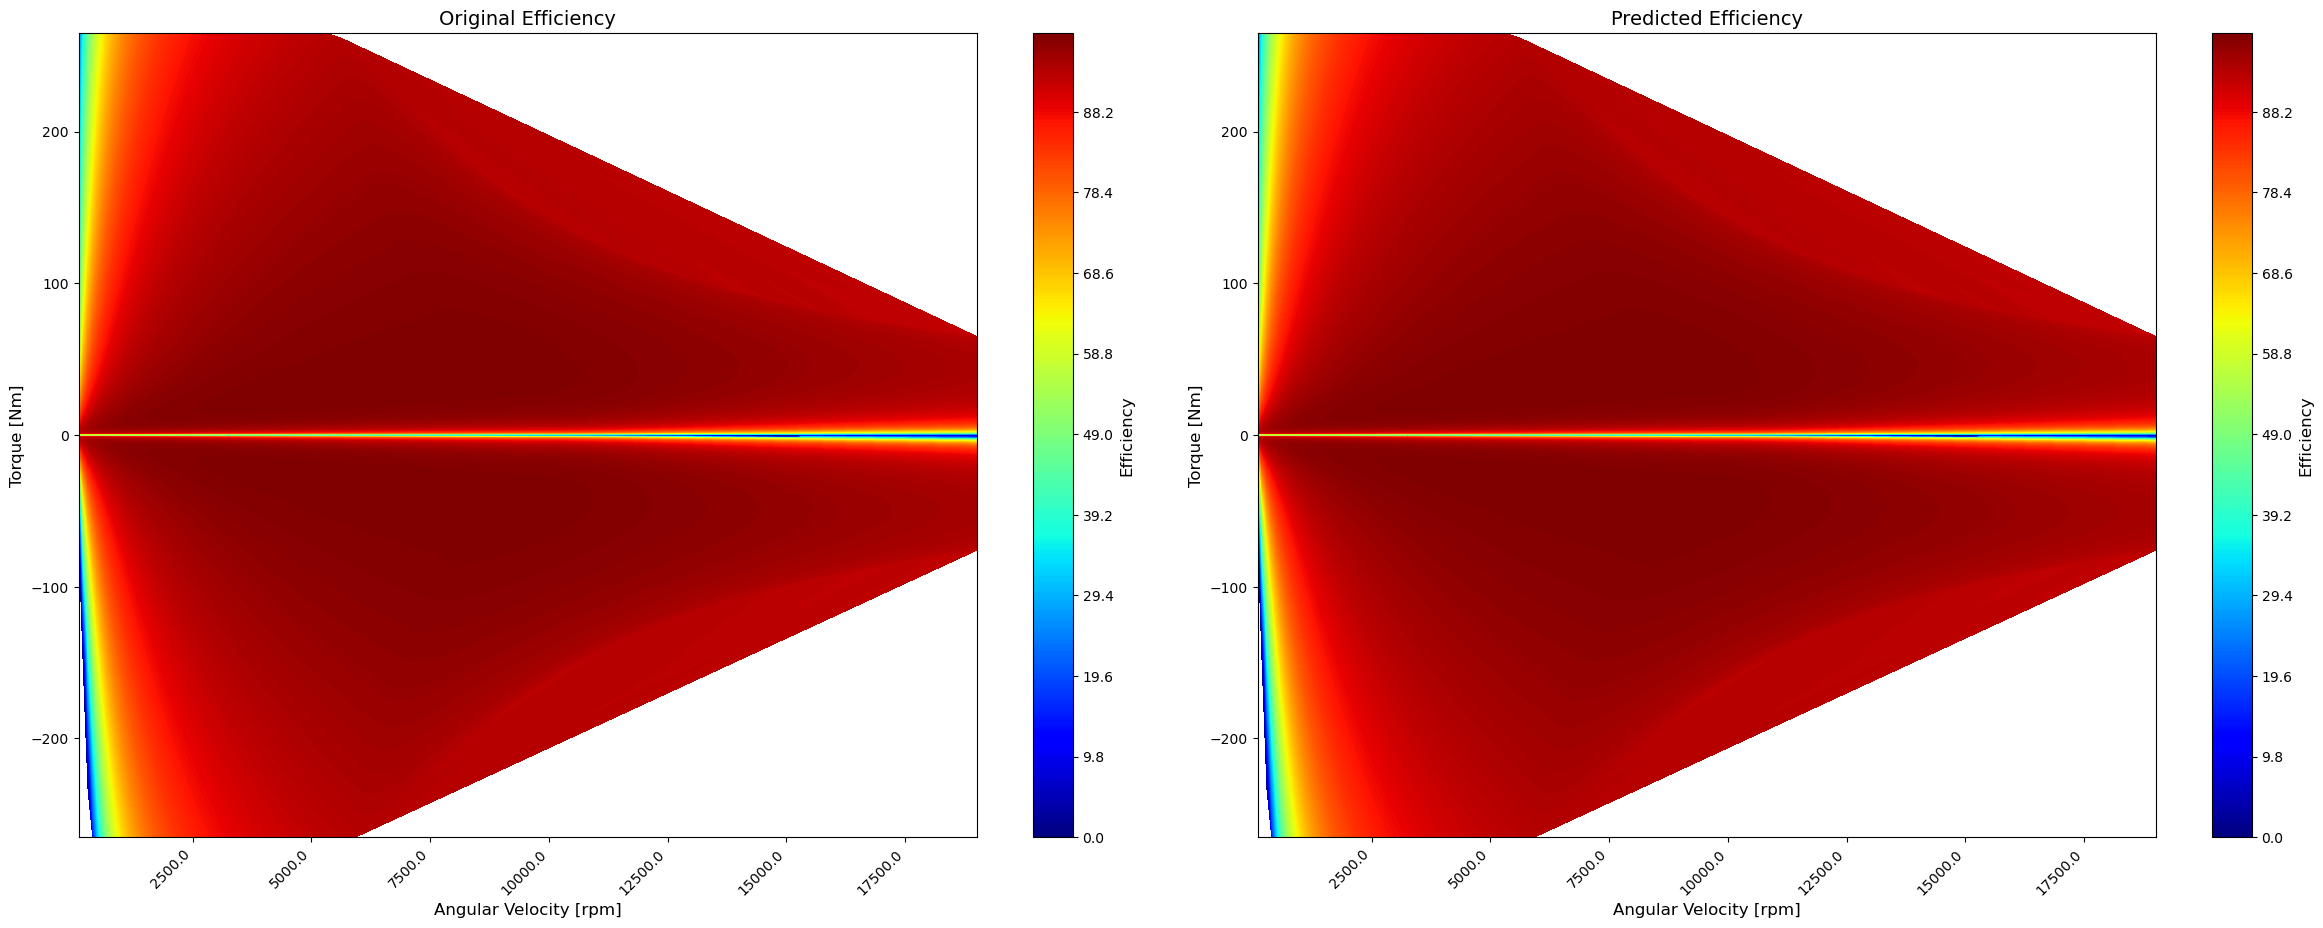

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

for ax, mm, eta, title in zip([ax1, ax2], [mm1, mm2], [eta1, eta2], ['Original', 'Predicted']):
    X = nn[0, 1:]
    Y = mm[1:, 0]
    Z = eta[1:, 1:]

    X, Y = np.meshgrid(X, Y)
    mask = np.isfinite(Z)
    X, Y, Z = X[mask], Y[mask], Z[mask]
    contour = ax.tricontourf(X.ravel(), Y.ravel(), Z.ravel(), levels=500, cmap='jet')

    ax.set_xlabel('Angular Velocity [rpm]', fontsize=12)
    ax.set_ylabel('Torque [Nm]', fontsize=12)
    ax.set_title(f'{title} Efficiency', fontsize=14)
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label('Efficiency', fontsize=12)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

Reading the tabular data

In [15]:
import pandas as pd

In [16]:
df_inputs=pd.read_csv('./data/TabularDataInputs.csv')

In [17]:
df_inputs.describe()

lmsov2       lth1v2       lth2v2         r1v2        r11v2  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000   
mean     -0.000289     0.005395     0.002789     0.002097     0.000326   
std       0.000035     0.000359     0.000178     0.000322     0.000040   
min      -0.000300     0.000000     0.000000     0.000000     0.000000   
25%      -0.000300     0.005450     0.002800     0.002200     0.000300   
50%      -0.000300     0.005450     0.002800     0.002200     0.000300   
75%      -0.000300     0.005450     0.002800     0.002200     0.000350   
max       0.000000     0.005450     0.002800     0.002200     0.000600   

              r2v2         r3v2         r4v2       rmt1v2       rmt4v2  ...  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000  ...   
mean      0.001873     0.000697     0.000747     0.000249     0.000249  ...   
std       0.000133     0.000044     0.000048     0.000016     0.000016  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.001900     0.000700     0.000750     0.000250     0.000250  ...   
50%       0.001900     0.000700     0.000750     0.000250     0.000250  ...   
75%       0.001900     0.000700     0.000750     0.000250     0.000250  ...   
max       0.001900     0.000700     0.000750     0.000250     0.000250  ...   

             dhphp        dhpng       N    simQ           r_a          r_i  \
count  1481.000000  1481.000000  1481.0  1481.0  1.481000e+03  1481.000000   
mean      0.000264     0.000406     4.0     6.0  9.000000e-02     0.064433   
std       0.000014     0.000003     0.0     0.0  2.554375e-15     0.000902   
min       0.000263     0.000406     4.0     6.0  9.000000e-02     0.064000   
25%       0.000263     0.000406     4.0     6.0  9.000000e-02     0.064000   
50%       0.000263     0.000406     4.0     6.0  9.000000e-02     0.064000   
75%       0.000263     0.000406     4.0     6.0  9.000000e-02     0.064000   
max       0.000485     0.000453     4.0     6.0  9.000000e-02     0.067000   

         rad_phiv2    rad_phiv1   rad_phi3b1   rad_phi4b1  
count  1481.000000  1481.000000  1481.000000  1481.000000  
mean     -0.511319    -0.694266    -0.002522    -0.000530  
std       0.063678     0.054700     0.056001     0.011775  
min      -0.645772    -0.785398    -1.256637    -0.261799  
25%      -0.558505    -0.733038     0.000000     0.000000  
50%      -0.523599    -0.698132     0.000000     0.000000  
75%      -0.471239    -0.645772     0.000000     0.000000  
max       0.000000    -0.453786     0.000000     0.000000  

[8 rows x 89 columns]

In [19]:
# Convert all float columns to float16
df_inputs = df_inputs.apply(lambda x: x.astype('float16') if np.issubdtype(x.dtype, np.floating) else x)

In [20]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1481 non-null   object 
 1   lmsov2      1481 non-null   float16
 2   lth1v2      1481 non-null   float16
 3   lth2v2      1481 non-null   float16
 4   r1v2        1481 non-null   float16
 5   r11v2       1481 non-null   float16
 6   r2v2        1481 non-null   float16
 7   r3v2        1481 non-null   float16
 8   r4v2        1481 non-null   float16
 9   rmt1v2      1481 non-null   float16
 10  rmt4v2      1481 non-null   float16
 11  rlt1v2      1481 non-null   float16
 12  rlt4v2      1481 non-null   float16
 13  hav2        1481 non-null   float16
 14  mbv2        1481 non-null   float16
 15  mhv2        1481 non-null   float16
 16  rmagv2      1481 non-null   float16
 17  dsmv2       1481 non-null   float16
 18  dsmuv2      1481 non-null   float16
 19  amtrv2      1481 non-null  

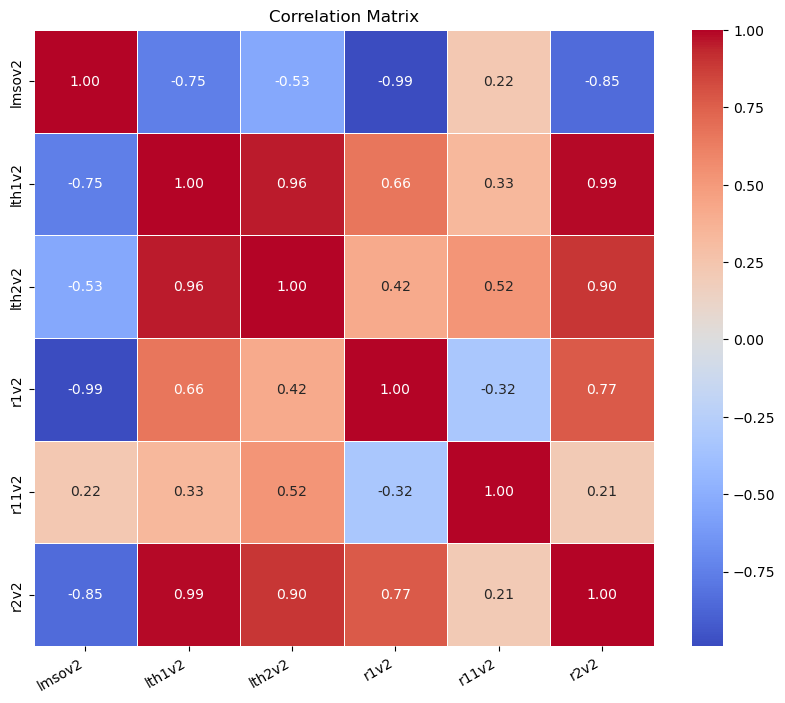

In [21]:
import seaborn as sns
# Assign the columns
columns_of_interest = ['lmsov2', 'lth1v2', 'lth2v2', 'r1v2', 'r11v2', 'r2v2']

# Calculate the correlation matrix
correlation_matrix = df_inputs[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

In [22]:
df_inputs

Unnamed: 0  lmsov2    lth1v2  \
0     738562.5564_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0002  0.005100   
1     738561.6593_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
2     738561.7042_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
3     738561.7173_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
4     738561.7112_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
...                                                 ...     ...       ...   
1476  738561.6341_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
1477  738561.6437_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
1478  738562.5603_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0002  0.005100   
1479  738561.6945_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   
1480  738561.7365_PM180_HPIN_4layer_p4q2_doubleV_pit... -0.0003  0.005451   

      lth2v2      r1v2    r11v2    r2v2    r3v2     r4v2   rmt1v2  ...  \
0     0.0028  0.001200  0.00040  0.0017  0.0007  0.00075  0.00025  ...   
1     0.0028  0.002199  0.00035  0.0019  0.0007  0.00075  0.00025  ...   
2     0.0028  0.002199  0.00030  0.0019  0.0007  0.00075  0.00025  ...   
3     0.0028  0.002199  0.00030  0.0019  0.0007  0.00075  0.00025  ...   
4     0.0028  0.002199  0.00030  0.0019  0.0007  0.00075  0.00025  ...   
...      ...       ...      ...     ...     ...      ...      ...  ...   
1476  0.0028  0.002199  0.00035  0.0019  0.0007  0.00075  0.00025  ...   
1477  0.0028  0.002199  0.00035  0.0019  0.0007  0.00075  0.00025  ...   
1478  0.0028  0.001200  0.00040  0.0017  0.0007  0.00075  0.00025  ...   
1479  0.0028  0.002199  0.00030  0.0019  0.0007  0.00075  0.00025  ...   
1480  0.0028  0.002199  0.00030  0.0019  0.0007  0.00075  0.00025  ...   

         dhphp     dhpng    N  simQ       r_a       r_i  rad_phiv2  rad_phiv1  \
0     0.000263  0.000406  4.0   6.0  0.090027  0.067017  -0.453857  -0.645996   
1     0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.558594  -0.785156   
2     0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.523438  -0.715820   
3     0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.506348  -0.732910   
4     0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.593262  -0.628418   
...        ...       ...  ...   ...       ...       ...        ...        ...   
1476  0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.576172  -0.593262   
1477  0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.523438  -0.750488   
1478  0.000263  0.000406  4.0   6.0  0.090027  0.067017  -0.453857  -0.698242   
1479  0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.558594  -0.750488   
1480  0.000263  0.000406  4.0   6.0  0.090027  0.064026  -0.576172  -0.663086   

      rad_phi3b1  rad_phi4b1  
0            0.0         0.0  
1            0.0         0.0  
2            0.0         0.0  
3            0.0         0.0  
4            0.0         0.0  
...          ...         ...  
1476         0.0         0.0  
1477         0.0         0.0  
1478         0.0         0.0  
1479         0.0         0.0  
1480         0.0         0.0  

[1481 rows x 90 columns]

In [72]:
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

# for column in df_inputs.columns:
#     plt.figure(figsize=(10, 6))  # Create a figure for each histogram
#     plt.hist(df_inputs[column], bins=30, edgecolor='k')  # Adjust bins as necessary
#     plt.title(f'Histogram for {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [7]:
df_targets=pd.read_csv('./data/TabularDataTargets.csv')

In [8]:
df_targets

Unnamed: 0  Column_1  Column_2  \
0     738562.5564_PM180_HPIN_4layer_p4q2_doubleV_pit...       279       278   
1     738561.6593_PM180_HPIN_4layer_p4q2_doubleV_pit...       259       259   
2     738561.7042_PM180_HPIN_4layer_p4q2_doubleV_pit...       255       255   
3     738561.7173_PM180_HPIN_4layer_p4q2_doubleV_pit...       249       249   
4     738561.7112_PM180_HPIN_4layer_p4q2_doubleV_pit...       245       245   
...                                                 ...       ...       ...   
1476  738561.6341_PM180_HPIN_4layer_p4q2_doubleV_pit...       255       255   
1477  738561.6437_PM180_HPIN_4layer_p4q2_doubleV_pit...       257       257   
1478  738562.5603_PM180_HPIN_4layer_p4q2_doubleV_pit...       278       278   
1479  738561.6945_PM180_HPIN_4layer_p4q2_doubleV_pit...       252       251   
1480  738561.7365_PM180_HPIN_4layer_p4q2_doubleV_pit...       251       251   

      Column_3  Column_4  Column_5  Column_6  Column_7  Column_8  Column_9  \
0          278       278       278       278       278       278       278   
1          259       259       259       259       259       259       259   
2          255       255       255       255       255       255       255   
3          249       249       249       249       248       248       248   
4          245       245       245       245       245       245       245   
...        ...       ...       ...       ...       ...       ...       ...   
1476       255       255       255       255       255       255       255   
1477       257       257       257       257       257       257       257   
1478       278       278       277       277       277       277       277   
1479       251       251       251       251       251       251       251   
1480       251       251       251       251       251       251       251   

      ...  Column_182  Column_183  Column_184  Column_185  Column_186  \
0     ...          66          65          65          65          64   
1     ...          70          69          69          69          68   
2     ...          67          66          66          65          65   
3     ...          64          63          62          62          62   
4     ...          62          62          61          61          60   
...   ...         ...         ...         ...         ...         ...   
1476  ...          67          67          66          66          66   
1477  ...          69          68          68          67          67   
1478  ...          66          66          65          65          64   
1479  ...          66          65          65          64          64   
1480  ...          63          62          62          62          61   

      Column_187  Column_188  Column_189  Column_190  Column_191  
0             64          63          63          63          62  
1             68          67          67          66          66  
2             65          64          64          63          63  
3             61          61          60          60          60  
4             60          59          59          59          58  
...          ...         ...         ...         ...         ...  
1476          65          65          64          64          63  
1477          66          66          66          65          65  
1478          64          64          63          63          62  
1479          64          63          63          63          62  
1480          61          60          60          60          59  

[1481 rows x 192 columns]

In [9]:
df_targets.describe()

Column_1     Column_2     Column_3     Column_4     Column_5  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000   
mean    257.240378   256.906820   256.896016   256.886563   256.875084   
std       8.505897     8.473853     8.473727     8.472489     8.470772   
min     216.000000   215.000000   215.000000   215.000000   215.000000   
25%     252.000000   251.000000   251.000000   251.000000   251.000000   
50%     256.000000   256.000000   256.000000   256.000000   256.000000   
75%     261.000000   260.000000   260.000000   260.000000   260.000000   
max     280.000000   280.000000   280.000000   280.000000   280.000000   

          Column_6     Column_7     Column_8     Column_9    Column_10  ...  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000  ...   
mean    256.860905   256.846725   256.835922   256.818366   256.806887  ...   
std       8.469155     8.466716     8.465954     8.469187     8.467776  ...   
min     215.000000   215.000000   215.000000   215.000000   215.000000  ...   
25%     251.000000   251.000000   251.000000   251.000000   251.000000  ...   
50%     256.000000   256.000000   256.000000   256.000000   256.000000  ...   
75%     260.000000   260.000000   260.000000   260.000000   260.000000  ...   
max     280.000000   280.000000   280.000000   280.000000   280.000000  ...   

        Column_182   Column_183   Column_184   Column_185   Column_186  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000   
mean     65.884537    65.409858    65.001350    64.553680    64.128967   
std       2.697253     2.671195     2.660014     2.633462     2.632485   
min      48.000000    48.000000    48.000000    47.000000    47.000000   
25%      64.000000    63.000000    63.000000    62.000000    62.000000   
50%      66.000000    66.000000    65.000000    65.000000    64.000000   
75%      68.000000    68.000000    67.000000    67.000000    66.000000   
max      70.000000    70.000000    69.000000    69.000000    68.000000   

        Column_187   Column_188   Column_189   Column_190   Column_191  
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000  
mean     63.717758    63.280891    62.902768    62.471303    62.088454  
std       2.598599     2.605756     2.575875     2.562335     2.551816  
min      47.000000    46.000000    46.000000    46.000000    46.000000  
25%      62.000000    61.000000    61.000000    60.000000    60.000000  
50%      64.000000    64.000000    63.000000    63.000000    62.000000  
75%      66.000000    66.000000    65.000000    65.000000    64.000000  
max      68.000000    67.000000    67.000000    66.000000    66.000000  

[8 rows x 191 columns]

In [2]:
# from src.data_preprocessing_tabular import dataset_creation
# train_dataset, val_dataset, input_size, output_y1_size, df_test_inputs, df_test_y1_targets = dataset_creation()

/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Inference only for 2D KPI prediction

In [15]:
import pandas as pd

New Files Evaluation - Easier for Client

In [11]:
If required by client only then run below code as the xslx files are read, there is time overhead

SyntaxError: invalid syntax (1698488653.py, line 1)

In [16]:
from src.table_creation import create_tabular_data
import os

from tqdm import tqdm

directory = '/home/k64889/Masters-Thesis/data/temp'

df_test_inputs=pd.DataFrame()
df_test_y1_targets=pd.DataFrame()

for filename in tqdm(os.listdir(directory)):
    file_path = os.path.join(directory, filename)
    df_partial_inputs, df_partial_targets = create_tabular_data(file_path)
    
    if df_partial_inputs is not None:
        df_test_inputs = pd.concat([df_test_inputs, df_partial_inputs])
        
    if df_partial_targets is not None:
        df_test_y1_targets = pd.concat([df_test_y1_targets, df_partial_targets])
        

  0%|          | 0/2 [00:00<?, ?it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fc4e0835300>>
Traceback (most recent call last):
  File "/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
100%|██████████| 2/2 [00:34<00:00, 17.06s/it]


Else from Test Dataset After split

In [17]:
input_size = df_test_inputs.shape[1]
output_y1_size = df_test_y1_targets.shape[1]

In [18]:
from src.model import mlp_kpi2d

# 5 hidden layers with different sizes
hidden_sizes = [126,256,516]

model = mlp_kpi2d(input_size, hidden_sizes, output_y1_size)

In [19]:
from src.inference import generate_predictions

In [20]:
df_test_inputs.index

Index(['738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitched_112_000001', '738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitched_118_000005'], dtype='object')

In [21]:
df_test_inputs

lmsov2   lth1v2  lth2v2  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche... -0.0003  0.00545  0.0028   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc... -0.0003  0.00545  0.0028   

                                                      r1v2    r11v2    r2v2  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...  0.0022  0.00030  0.0019   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...  0.0022  0.00035  0.0019   

                                                      r3v2     r4v2   rmt1v2  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...  0.0007  0.00075  0.00025   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...  0.0007  0.00075  0.00025   

                                                     rmt4v2  ...   h_zk  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...  0.00025  ...  0.001   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...  0.00025  ...  0.001   

                                                        bhp     hhp      rhp  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...  0.00365  0.0023  0.00065   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...  0.00380  0.0026  0.00065   

                                                       dhphp     dhpng    N  \
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...  0.000263  0.000406  4.0   
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...  0.000263  0.000406  4.0   

                                                    simQ   r_a    r_i  
738561.74_PM180_HPIN_4layer_p4q2_doubleV_pitche...   6.0  0.09  0.064  
738611.5976_PM180_HPIN_4layer_p4q2_doubleV_pitc...   6.0  0.09  0.065  

[2 rows x 89 columns]

In [23]:
model_path='./model.pth'
df_predictions = generate_predictions(model_path, df_test_inputs, df_test_y1_targets, scaler_x, scaler_y1)

Predictions shape: (2, 191)


In [24]:
from src.utils import plot_testdataset_kpi2d

end is alwys greater than or equal to 4, this function is not that great

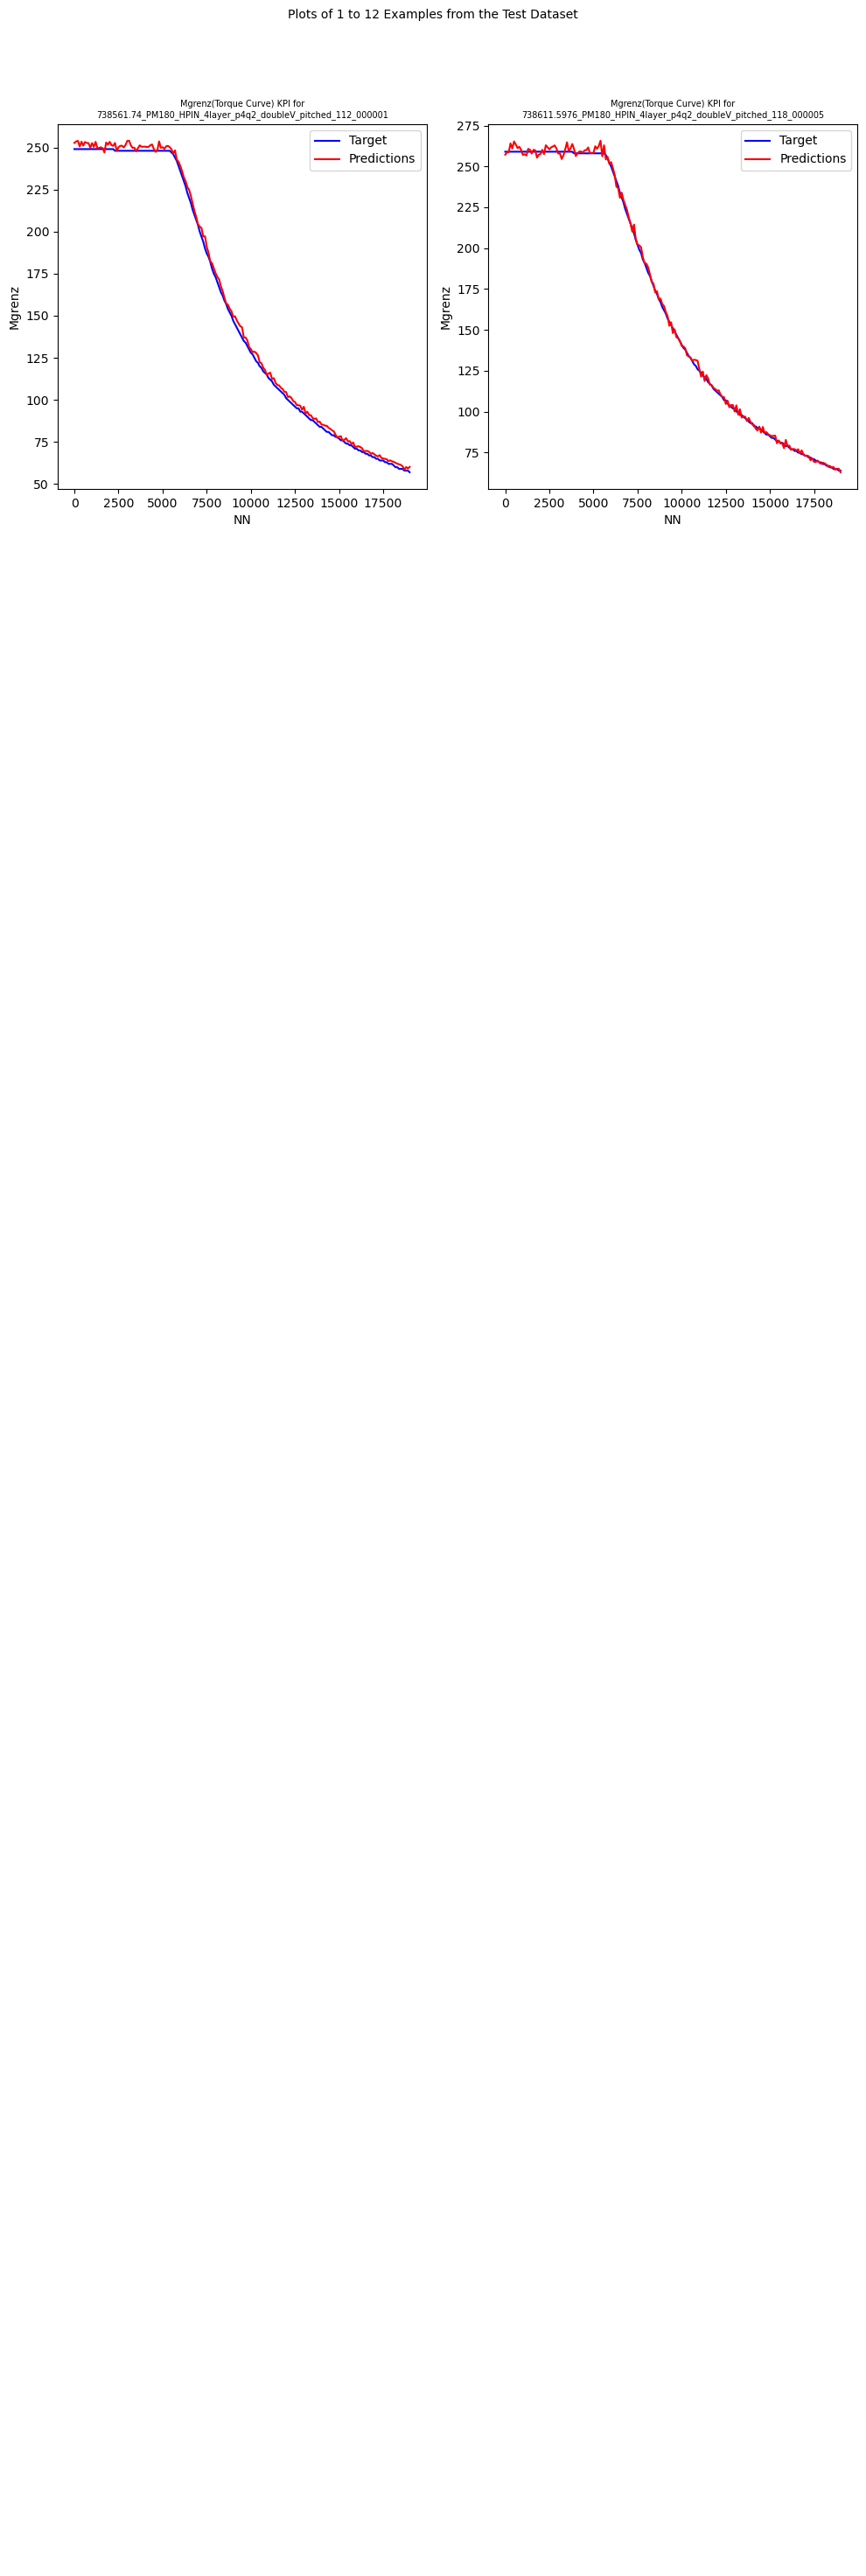

In [26]:
plot_testdataset_kpi2d(df_test_y1_targets, df_predictions,start=1, end=12)

In [24]:
df_test_inputs.index

Index(['738562.5614_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_020_000013',
       '738561.6696_PM180_HPIN_4layer_p4q2_doubleV_pitched_047_000002',
       '738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitched_029_000004',
       '738561.6576_PM180_HPIN_4layer_p4q2_doubleV_pitched_036_000003',
       '738561.6413_PM180_HPIN_4layer_p4q2_doubleV_pitched_009_000005',
       '738561.7001_PM180_HPIN_4layer_p4q2_doubleV_pitched_074_000010',
       '738611.6026_PM180_HPIN_4layer_p4q2_doubleV_pitched_127_000001',
       '738562.5546_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_015_000010',
       '738561.6756_PM180_HPIN_4layer_p4q2_doubleV_pitched_052_000007',
       '738561.6858_PM180_HPIN_4layer_p4q2_doubleV_pitched_061_000010',
       '738561.6351_PM180_HPIN_4layer_p4q2_doubleV_pitched_003_000009',
       '738562.5587_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_018_000012',
       '738611.6013_PM180_HPIN_4layer_p4q2_doubleV_pitched_124_000006',
       '738611.6152_PM180_HPIN_4layer_p4q2_doubleV_pit

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, d2_absolute_error_score
import numpy as np

def comprehensive_regression_metrics(df_targets, df_predictions):

    assert df_targets.index.equals(df_predictions.index), "Both target and prediction dfs must have the same index"
    
    metrics_list = []
    for index in df_targets.index:
        y_true = df_targets.loc[index].values
        y_pred = df_predictions.loc[index].values
        
        sample_metrics = {
            "MSE": mean_squared_error(y_true, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
            "MAE": mean_absolute_error(y_true, y_pred),
            "R2": r2_score(y_true, y_pred),
            "Max Error": max_error(y_true, y_pred),
            "Mean Poisson Deviance": mean_poisson_deviance(y_true, y_pred),
            "Mean Gamma Deviance": mean_gamma_deviance(y_true, y_pred),
            "MAPE": mean_absolute_percentage_error(y_true, y_pred),
            "D2 Absolute Error Score": d2_absolute_error_score(y_true, y_pred)
        }
        metrics_list.append(sample_metrics)
    
    df_metrics = pd.DataFrame(metrics_list, index=df_targets.index)
    return df_metrics

In [26]:
result_metrics = comprehensive_regression_metrics(df_test_y1_targets, df_predictions)

In [27]:
result_metrics

MSE      RMSE  \
738562.5614_PM180_HPIN_4layer_p4q2_doubleV_pitc...  13.341576  3.652612   
738561.6696_PM180_HPIN_4layer_p4q2_doubleV_pitc...   6.324286  2.514813   
738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitche...   6.930973  2.632674   
738561.6576_PM180_HPIN_4layer_p4q2_doubleV_pitc...   4.090165  2.022416   
738561.6413_PM180_HPIN_4layer_p4q2_doubleV_pitc...   2.808605  1.675889   
738561.7001_PM180_HPIN_4layer_p4q2_doubleV_pitc...   7.650399  2.765935   
738611.6026_PM180_HPIN_4layer_p4q2_doubleV_pitc...   4.249579  2.061451   
738562.5546_PM180_HPIN_4layer_p4q2_doubleV_pitc...  10.253133  3.202051   
738561.6756_PM180_HPIN_4layer_p4q2_doubleV_pitc...   4.548119  2.132632   
738561.6858_PM180_HPIN_4layer_p4q2_doubleV_pitc...  12.506287  3.536423   
738561.6351_PM180_HPIN_4layer_p4q2_doubleV_pitc...   9.679320  3.111161   
738562.5587_PM180_HPIN_4layer_p4q2_doubleV_pitc...   9.247326  3.040942   
738611.6013_PM180_HPIN_4layer_p4q2_doubleV_pitc...   6.025843  2.454759   
738611.6152_PM180_HPIN_4layer_p4q2_doubleV_pitc...   5.177068  2.275317   
738611.6044_PM180_HPIN_4layer_p4q2_doubleV_pitc...  12.287307  3.505325   
738561.7081_PM180_HPIN_4layer_p4q2_doubleV_pitc...  23.141141  4.810524   
738561.6401_PM180_HPIN_4layer_p4q2_doubleV_pitc...   2.796661  1.672322   
738562.5669_PM180_HPIN_4layer_p4q2_doubleV_pitc...   9.957629  3.155571   
738561.6604_PM180_HPIN_4layer_p4q2_doubleV_pitc...   9.963340  3.156476   
738561.7103_PM180_HPIN_4layer_p4q2_doubleV_pitc...  11.652800  3.413620   
738611.5963_PM180_HPIN_4layer_p4q2_doubleV_pitc...   9.418854  3.069015   
738561.6496_PM180_HPIN_4layer_p4q2_doubleV_pitc...  13.023190  3.608766   
738611.6139_PM180_HPIN_4layer_p4q2_doubleV_pitc...   2.958883  1.720140   
738561.7166_PM180_HPIN_4layer_p4q2_doubleV_pitc...   8.288086  2.878904   
738561.6592_PM180_HPIN_4layer_p4q2_doubleV_pitc...   7.150705  2.674080   
738561.6505_PM180_HPIN_4layer_p4q2_doubleV_pitc...   6.985953  2.643095   
738561.638_PM180_HPIN_4layer_p4q2_doubleV_pitch...  10.593456  3.254759   
738561.7119_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.726633  1.930449   
738611.6106_PM180_HPIN_4layer_p4q2_doubleV_pitc...   4.256772  2.063195   
738561.6591_PM180_HPIN_4layer_p4q2_doubleV_pitc...   6.110749  2.471993   
738611.6062_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.629770  1.905195   
738561.6908_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.448441  1.856998   
738561.6795_PM180_HPIN_4layer_p4q2_doubleV_pitc...  15.874947  3.984338   
738611.6149_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.940583  1.985090   
738561.652_PM180_HPIN_4layer_p4q2_doubleV_pitch...   2.883411  1.698061   
738561.6638_PM180_HPIN_4layer_p4q2_doubleV_pitc...  10.859793  3.295420   
738562.5645_PM180_HPIN_4layer_p4q2_doubleV_pitc...  12.302804  3.507535   
738611.602_PM180_HPIN_4layer_p4q2_doubleV_pitch...   5.554274  2.356751   
738561.6543_PM180_HPIN_4layer_p4q2_doubleV_pitc...   1.791373  1.338422   
738561.7236_PM180_HPIN_4layer_p4q2_doubleV_pitc...   5.806266  2.409619   
738561.6474_PM180_HPIN_4layer_p4q2_doubleV_pitc...  16.462500  4.057401   
738611.6112_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.161126  1.777956   
738561.6386_PM180_HPIN_4layer_p4q2_doubleV_pitc...  14.612327  3.822607   
738561.7176_PM180_HPIN_4layer_p4q2_doubleV_pitc...   7.311004  2.703887   
738611.6015_PM180_HPIN_4layer_p4q2_doubleV_pitc...   5.832042  2.414962   
738561.6341_PM180_HPIN_4layer_p4q2_doubleV_pitc...  11.665259  3.415444   
738561.6437_PM180_HPIN_4layer_p4q2_doubleV_pitc...   3.883184  1.970580   
738562.5603_PM180_HPIN_4layer_p4q2_doubleV_pitc...  15.027994  3.876596   
738561.6945_PM180_HPIN_4layer_p4q2_doubleV_pitc...   8.970543  2.995087   
738561.7365_PM180_HPIN_4layer_p4q2_doubleV_pitc...   7.959938  2.821336   

                                                         MAE        R2  \
738562.5614_PM180_HPIN_4layer_p4q2_doubleV_pitc...  2.655846  0.997932   
738561.6696_PM180_HPIN_4layer_p4q2_doubleV_pitc...  1.928949  0.998881   
738561.65_

## 3D KPI - ETA Grid

In [1]:
from src.data_preprocessing_tabular import data_prep_complete

In [2]:
test_size=50
x_normalized, y1_normalized, y2_normalized, scaler_x, scaler_y1, scaler_y2, input_size, output_y1_size, output_y2_size, df_test_inputs, df_test_y1_targets, max_mgrenz=data_prep_complete(test_size)

280


/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


1.0000000000000284
-1.0


In [3]:
print(x_normalized.shape)
print(y1_normalized.shape)
print(y2_normalized.shape)

(1431, 89)
(1431, 191)
(1431, 561, 191)


In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from src.model import mlp_kpi3d
from src.training import mlp_kpi3d_trainer as mlp_kpi3d_trainer, LossRegularisation as loss_regularisation
from sklearn.model_selection import KFold
import wandb
import numpy as np


hidden_sizes = 256
batch_size = 64##try with 72 also
epochs = 10
learning_rate = 0.0075
lambda_loss_regularizer=1.5
splits=5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kf = KFold(n_splits=splits, shuffle=True, random_state=42)##Goto store splits and load from there to be sure of reproducibiiity
# Store the cross-validation splits
splits_file = 'cross_val_splits.npy'
# splits_indices=kf.split(x_normalized)
# splits_indices = [(train_index, val_index) for train_index, val_index in kf.split(x_normalized)]
# np.save(splits_file, np.array(splits_indices, dtype=object), allow_pickle=True)

# Load the cross-validation splits
splits_indices = np.load(splits_file, allow_pickle=True)

# Lists to store results
cross_train_losses_y1, cross_train_losses_y2 = [], []
cross_val_losses_y1, cross_val_losses_y2 = [], []
cross_train_r2_y1, cross_train_r2_y2 = [], []
cross_val_r2_y1, cross_val_r2_y2  = [], []

best_combined_loss = 300
best_model = None
best_fold = -1

for fold, (train_index, val_index) in enumerate(splits_indices, 1):
    
    # Initialize wandb with a group to aggregate all runs of each cross-validation fold
    wandb.init(project="EM", config={
        "learning_rate": learning_rate,
        "architecture": "MLP",
        "hidden sizes": hidden_sizes,
        "epochs": epochs,
        }, group="6th Run", name=f"Fold {fold}")
    
    
    # Train-Validation data as per cross val splits
    x_train, x_val = x_normalized[train_index], x_normalized[val_index]
    y1_train, y1_val = y1_normalized[train_index], y1_normalized[val_index]
    y2_train, y2_val = y2_normalized[train_index], y2_normalized[val_index]
    
    train_dataset = TensorDataset(torch.FloatTensor(x_train).to(device), torch.FloatTensor(y1_train).to(device), torch.FloatTensor(y2_train).to(device))
    val_dataset = TensorDataset(torch.FloatTensor(x_val).to(device), torch.FloatTensor(y1_val).to(device), torch.FloatTensor(y2_val).to(device))
    
    y2_shape = (batch_size, y2_train.shape[1], y2_train.shape[2])  
    
    # TODO Then whats the benefit of doing k times?
    model = mlp_kpi3d(input_size, hidden_sizes, output_y1_size, y2_shape)
    #loss = nn.MSELoss()
    
    loss = loss_regularisation(lambda_loss_regularizer)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    trainer = mlp_kpi3d_trainer(model, train_dataset, val_dataset, batch_size, loss, optimizer, device)
    
    trainer.train(epochs)
    
    wandb.finish()

    cross_train_losses_y1.append(trainer.train_loss_history_y1)
    cross_train_losses_y2.append(trainer.train_loss_history_y2)
    cross_val_losses_y1.append(trainer.val_loss_history_y1)
    cross_val_losses_y2.append(trainer.val_loss_history_y2)
    cross_train_r2_y1.append(trainer.train_r2_history_y1)
    cross_train_r2_y2.append(trainer.train_r2_history_y2)
    cross_val_r2_y1.append(trainer.val_r2_history_y1)
    cross_val_r2_y2.append(trainer.val_r2_history_y2)
    
    # Combined loss of y1 and y2 per fold
    combined_loss = trainer.val_loss_history_y1[-1] + trainer.val_loss_history_y2[-1]
    
    # Combined loss of y1 and y2 to be the least and r2 score to be as close to 1 as possible
    if combined_loss < best_combined_loss and trainer.val_r2_history_y1[-1] > 0.7 and trainer.val_r2_history_y2[-1] > 0.3:
        best_combined_loss = combined_loss
        best_model = model
        best_fold = fold

# Calculate average metrics across folds
avg_train_losses_y1 = torch.mean(torch.tensor(cross_train_losses_y1), dim=0)
avg_train_losses_y2 = torch.mean(torch.tensor(cross_train_losses_y2), dim=0)
avg_val_losses_y1 = torch.mean(torch.tensor(cross_val_losses_y1), dim=0)
avg_val_losses_y2 = torch.mean(torch.tensor(cross_val_losses_y2), dim=0)

avg_train_r2_y1 = torch.mean(torch.tensor(cross_train_r2_y1), dim=0)
avg_train_r2_y2 = torch.mean(torch.tensor(cross_train_r2_y2), dim=0)
avg_val_r2_y1 = torch.mean(torch.tensor(cross_val_r2_y1), dim=0)
avg_val_r2_y2 = torch.mean(torch.tensor(cross_val_r2_y2), dim=0)

if best_model is not None:
    model.save('./model.pth')
    print(f"Best model saved from fold {best_fold}")
else:
    print("No model met the criteria for saving")


# Print the best fold's performance
print(f"Best fold: {best_fold}")
print(f"Best combined validation loss: {best_combined_loss}")
print(f"Best validation R2 for y1: {cross_val_r2_y1[best_fold-1][-1]}")
print(f"Best validation R2 for y2: {cross_val_r2_y2[best_fold-1][-1]}")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lilly-abraham (lilly-abraham-technische-hochschule-w-rzburg-schweinfurt). Use `wandb login --relogin` to force relogin


1144
1144
1144
1144
1144
1144
1144
1144
1144
1144


1145
1145
1145
1145
1145
1145
1145
1145
1145
1145


1145
1145
1145
1145
1145
1145
1145
1145
1145
1145


1145
1145
1145
1145
1145
1145
1145
1145
1145
1145


1145
1145
1145
1145
1145
1145
1145
1145
1145
1145


No model met the criteria for saving
Best fold: -1
Best combined validation loss: 300
Best validation R2 for y1: 0.806475818157196
Best validation R2 for y2: -1.4253309965133667


In [17]:
model.save('./model.pth')

In [18]:
model

mlp_kpi3d(
  (shared_layers): Sequential(
    (0): Linear(in_features=89, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (y1_layers): Sequential(
    (0): Linear(in_features=256, out_features=191, bias=True)
  )
  (y2_layers): Sequential(
    (0): Linear(in_features=256, out_features=2048, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=8192, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=8192, out_features=107151, bias=True)
  )
)

In [20]:
Inference

NameError: name 'a' is not defined

In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
from src.inference import generate_predictions
model_path='./model.pth'
df_predictions_y1, predictions_original_scale_y2, mm, eta_matrix = generate_predictions(model_path, df_test_inputs, df_test_y1_targets, scaler_x, scaler_y1, scaler_y2, device)

Predictions shape: (50, 191)
Predictions shape: (50, 561, 191)


In [6]:
from src.inference import plot_testdataset_kpi2d, plot_mean_std_kpi2d, plot_std_kpi2d, eval_plot_kpi2d

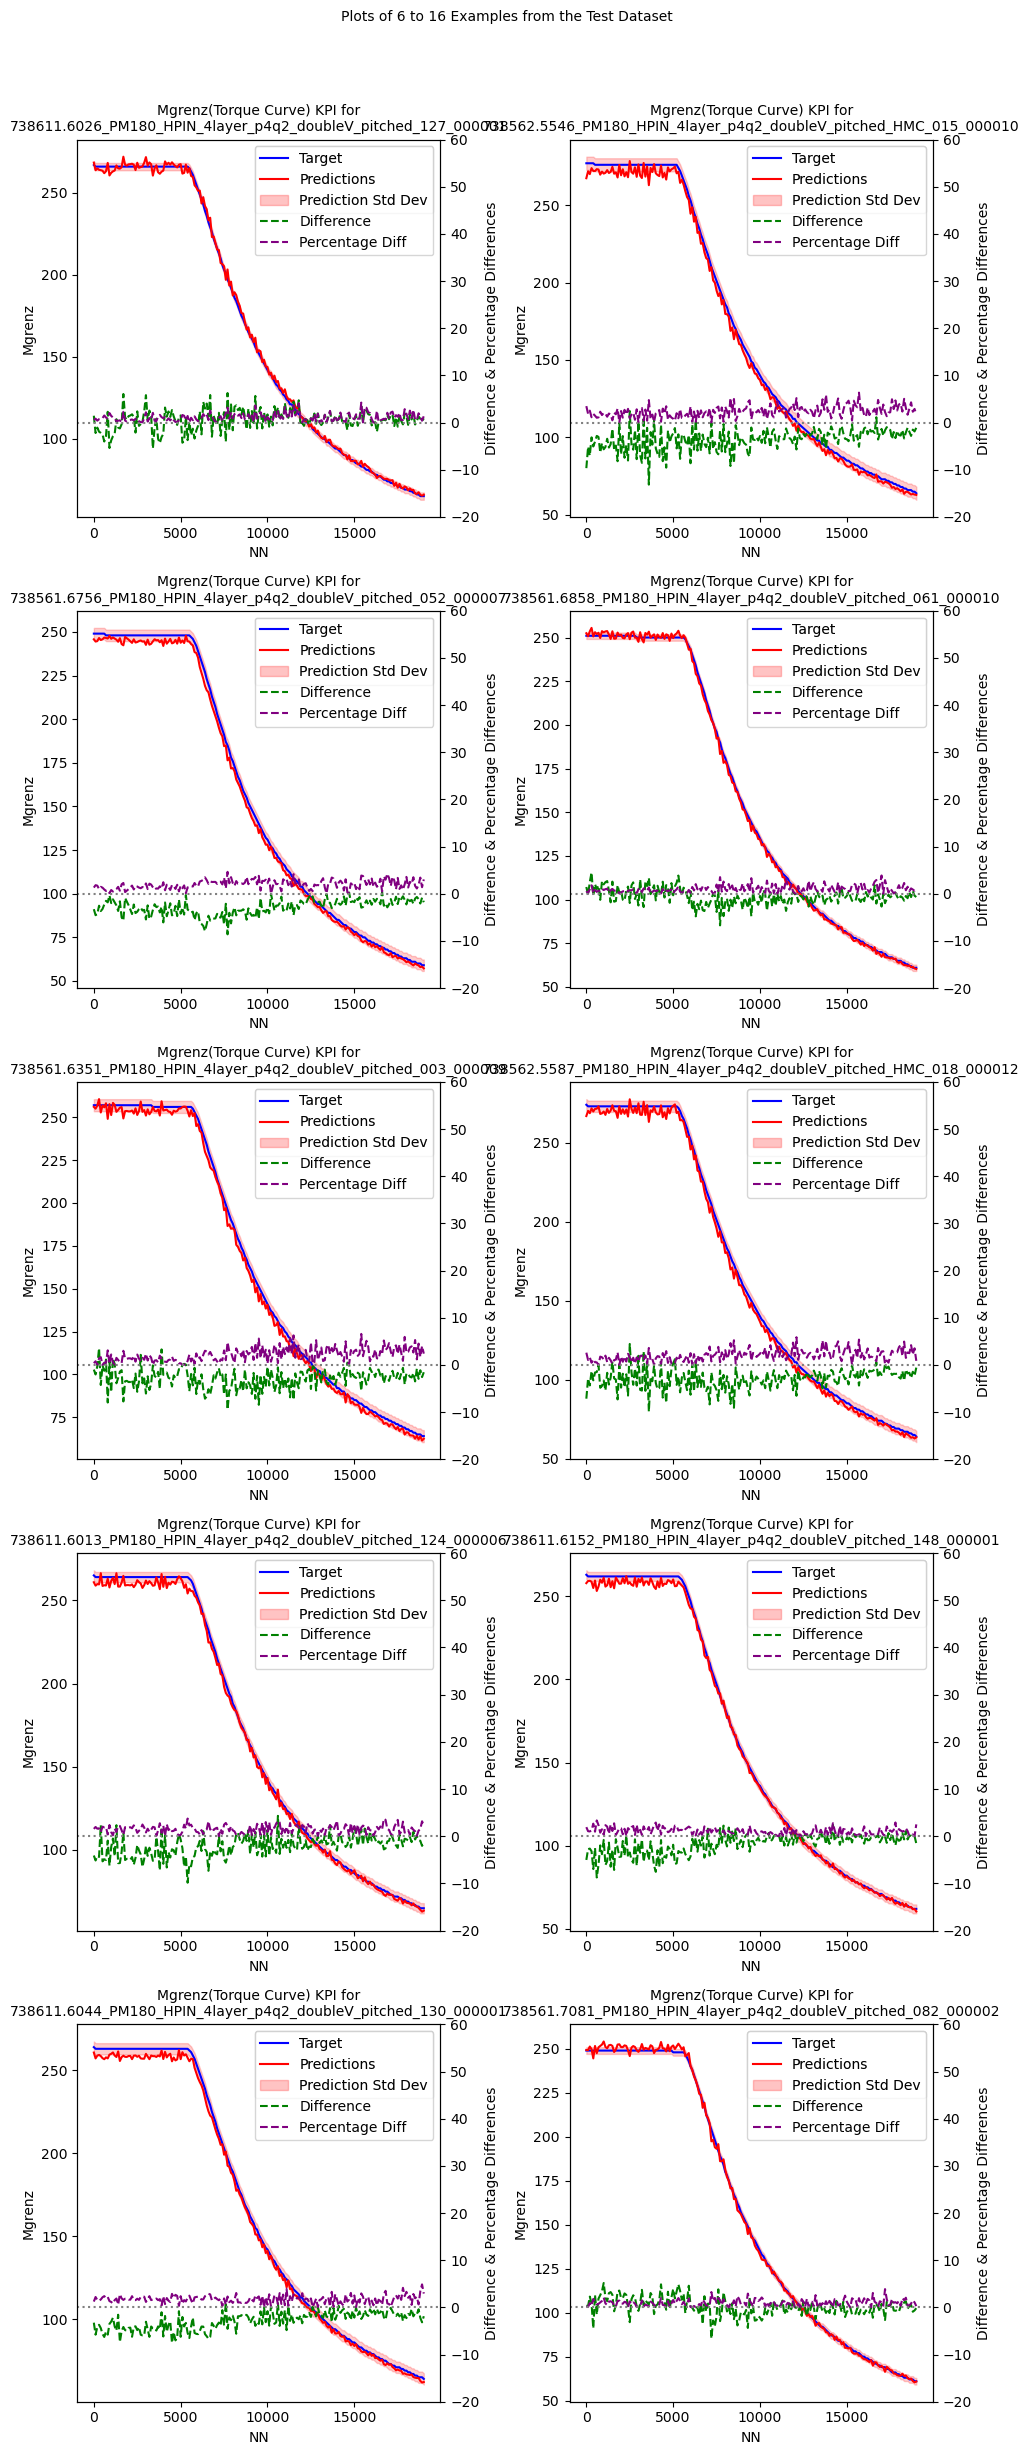

In [7]:
eval_plot_kpi2d(df_test_y1_targets, df_predictions_y1,start=6, end=16)

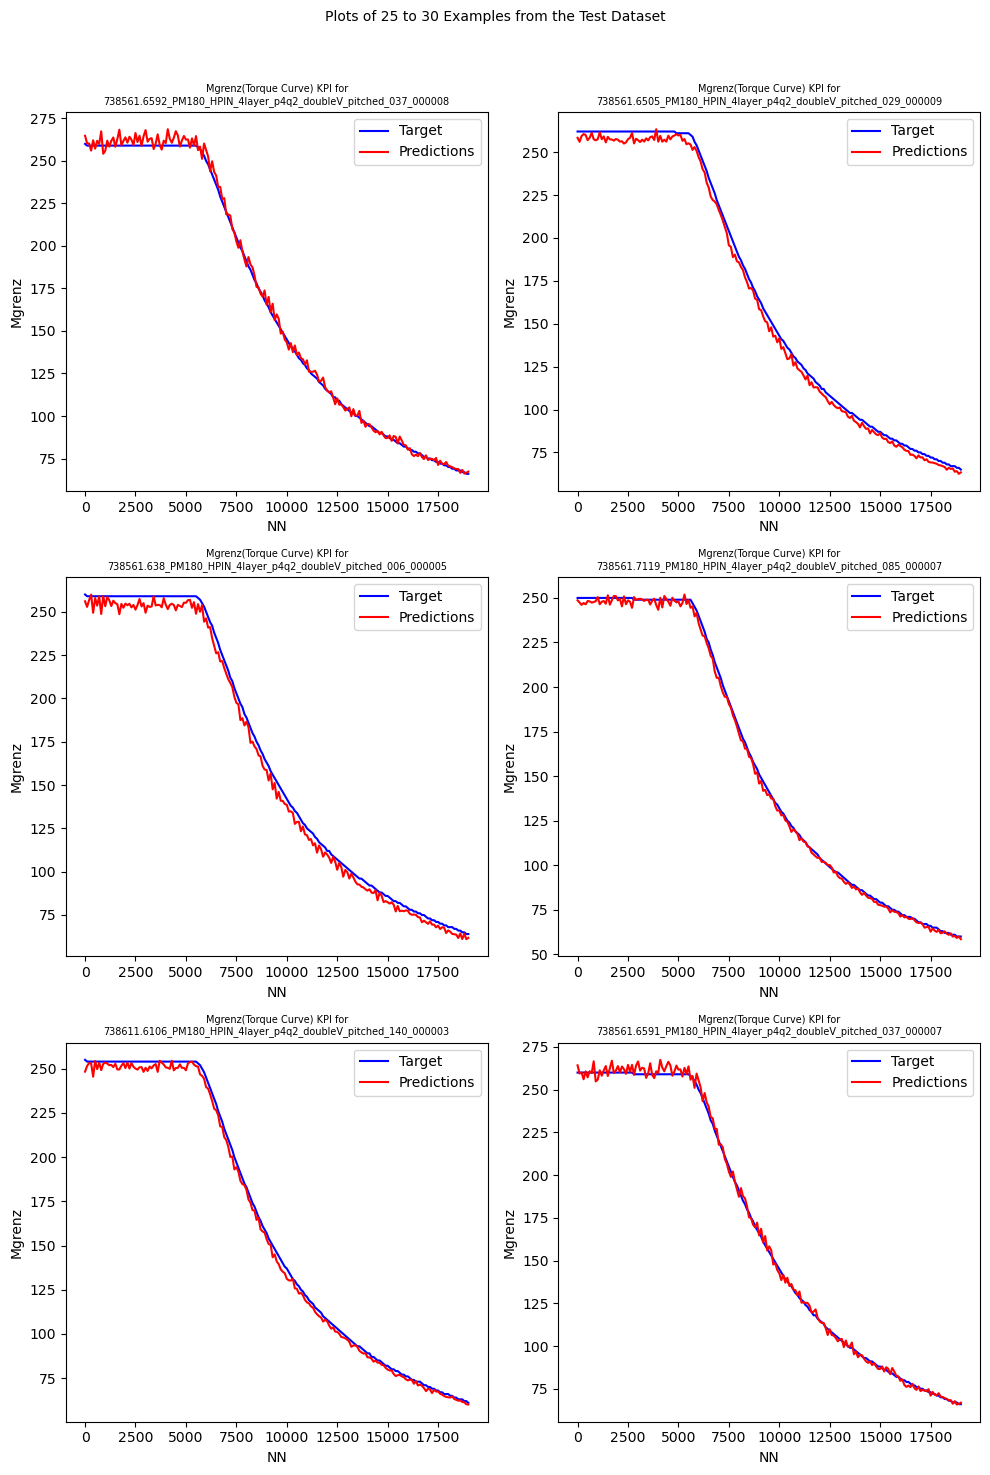

In [8]:
plot_testdataset_kpi2d(df_test_y1_targets, df_predictions_y1,start=25, end=30)

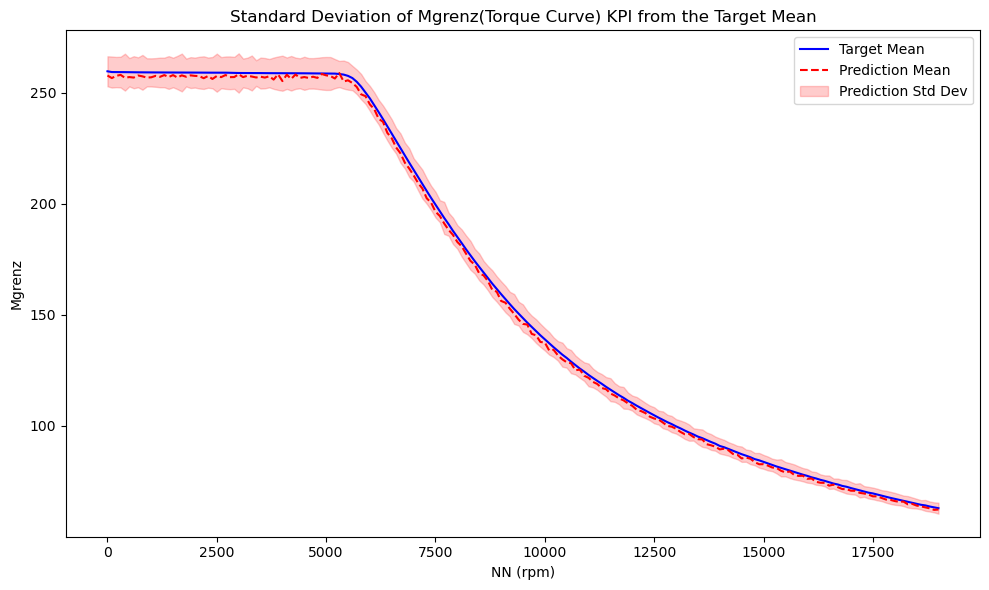

In [9]:
plot_std_kpi2d(df_test_y1_targets, df_predictions_y1)

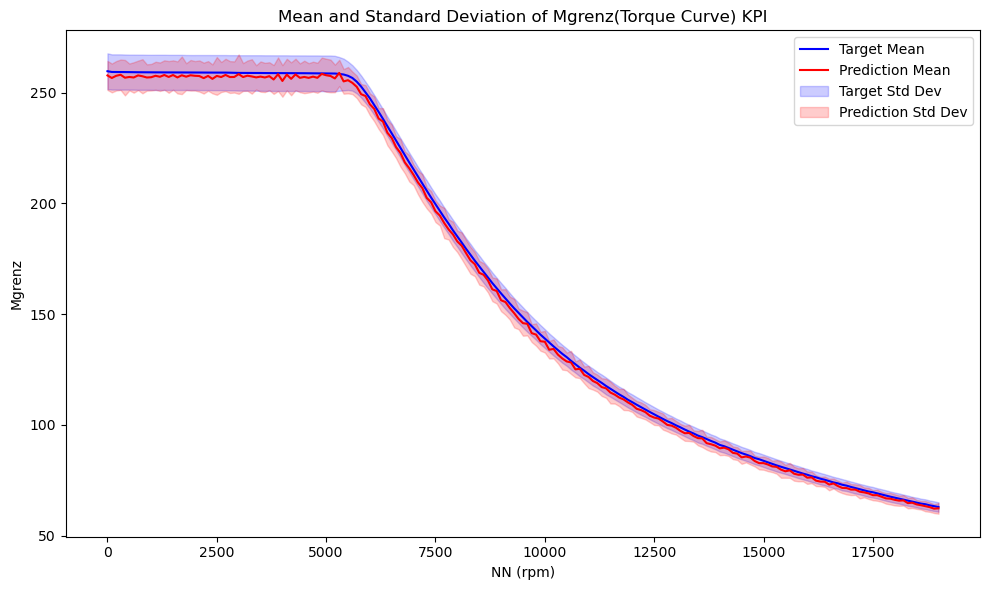

In [10]:
plot_mean_std_kpi2d(df_test_y1_targets, df_predictions_y1)###wrong

<Figure size 2400x2000 with 0 Axes>

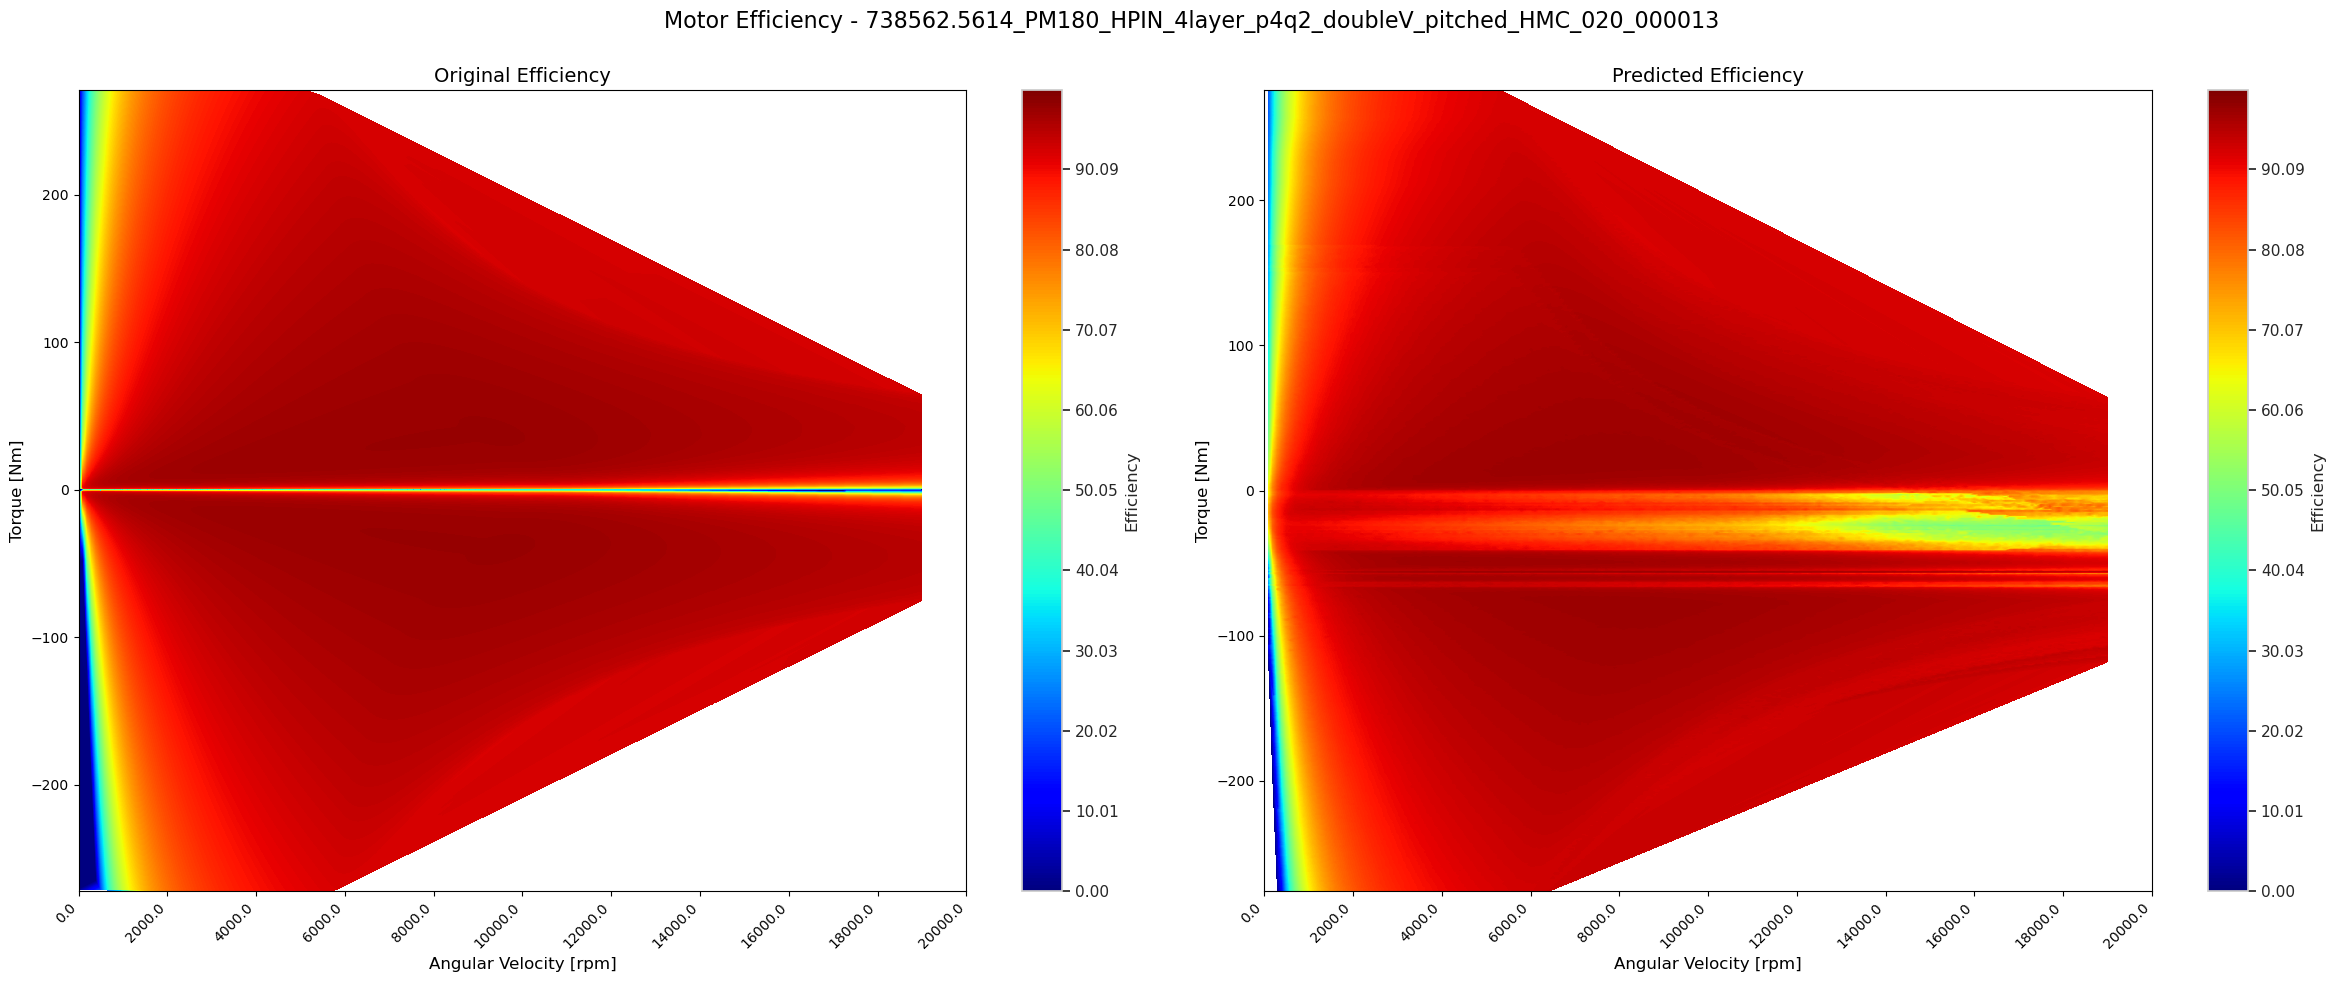

<Figure size 2400x2000 with 0 Axes>

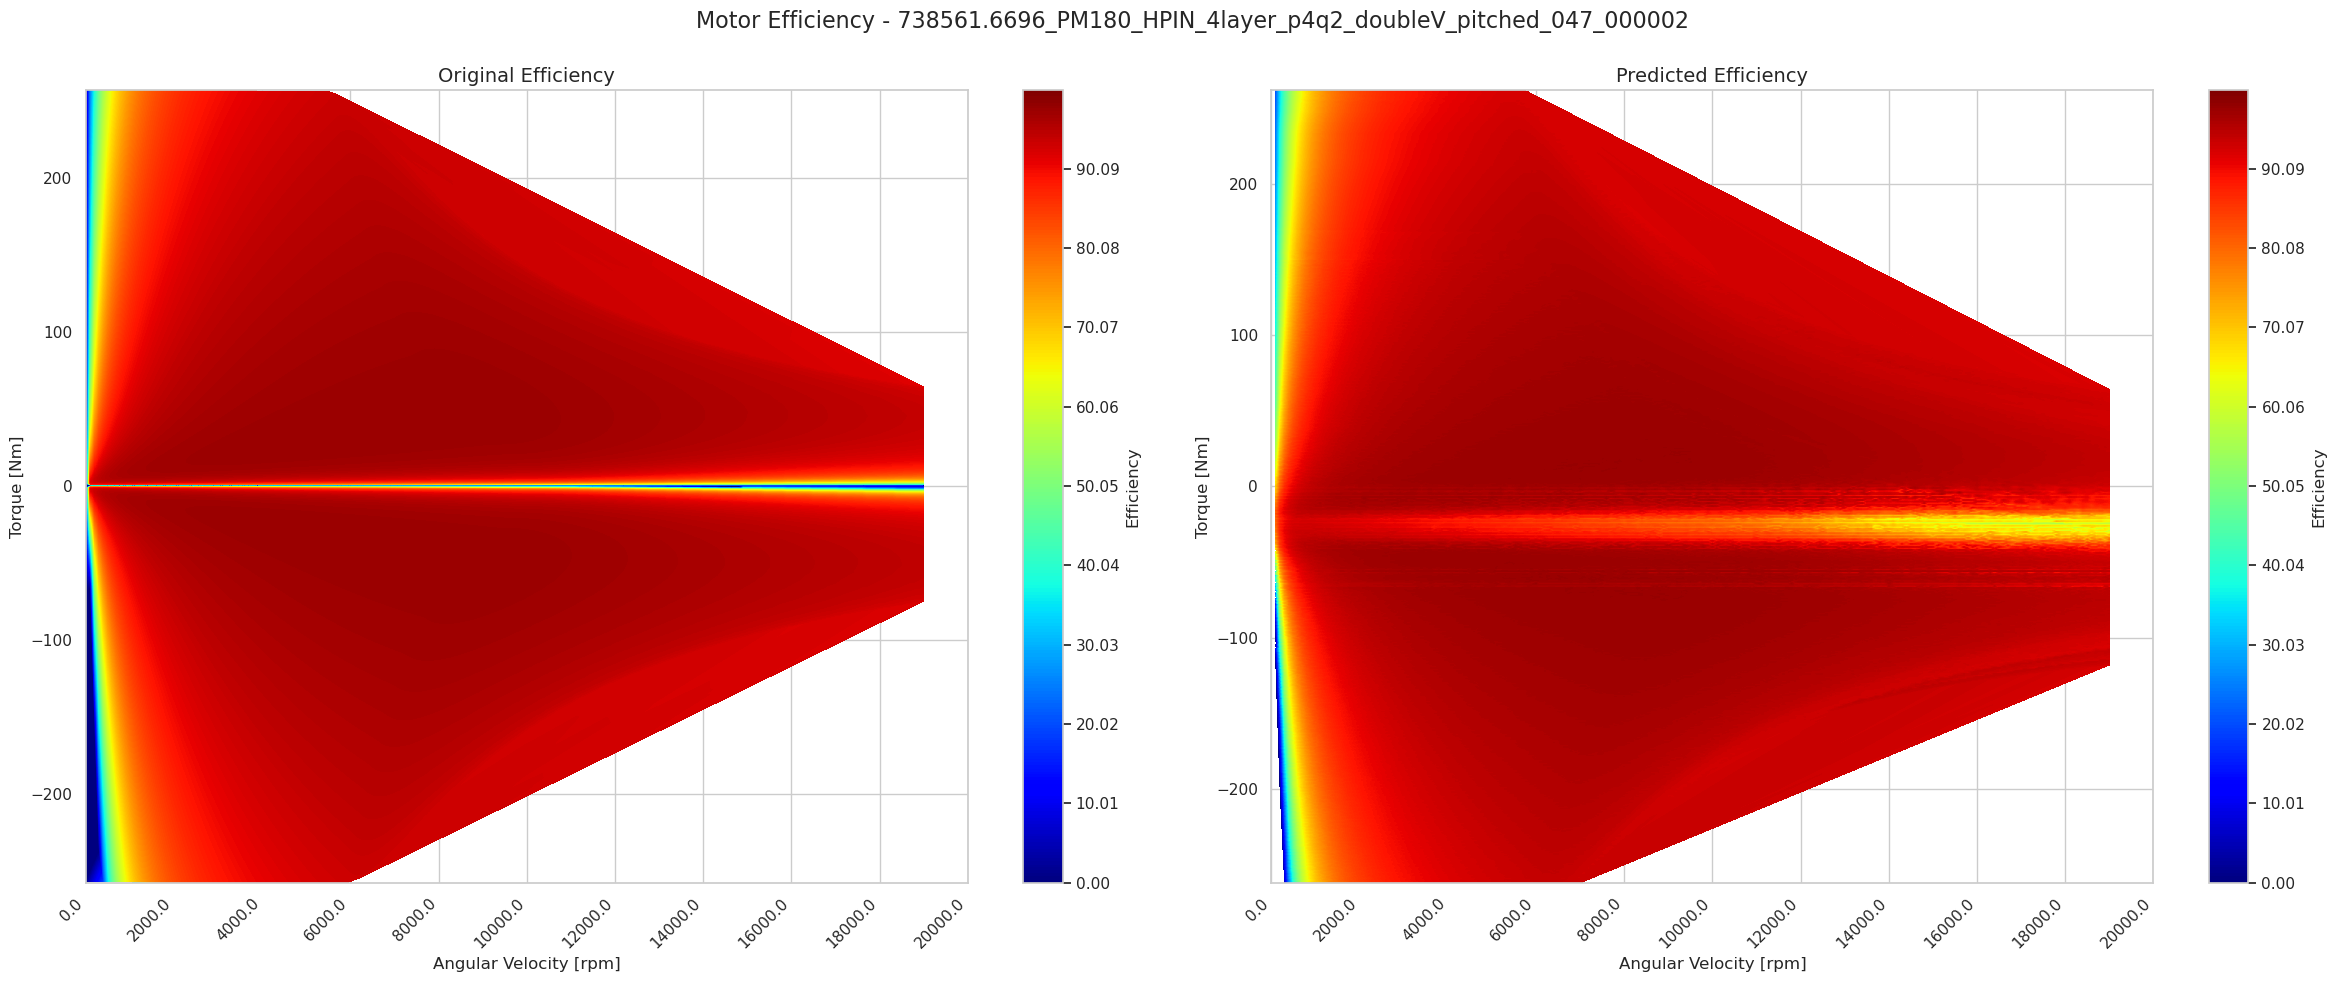

<Figure size 2400x2000 with 0 Axes>

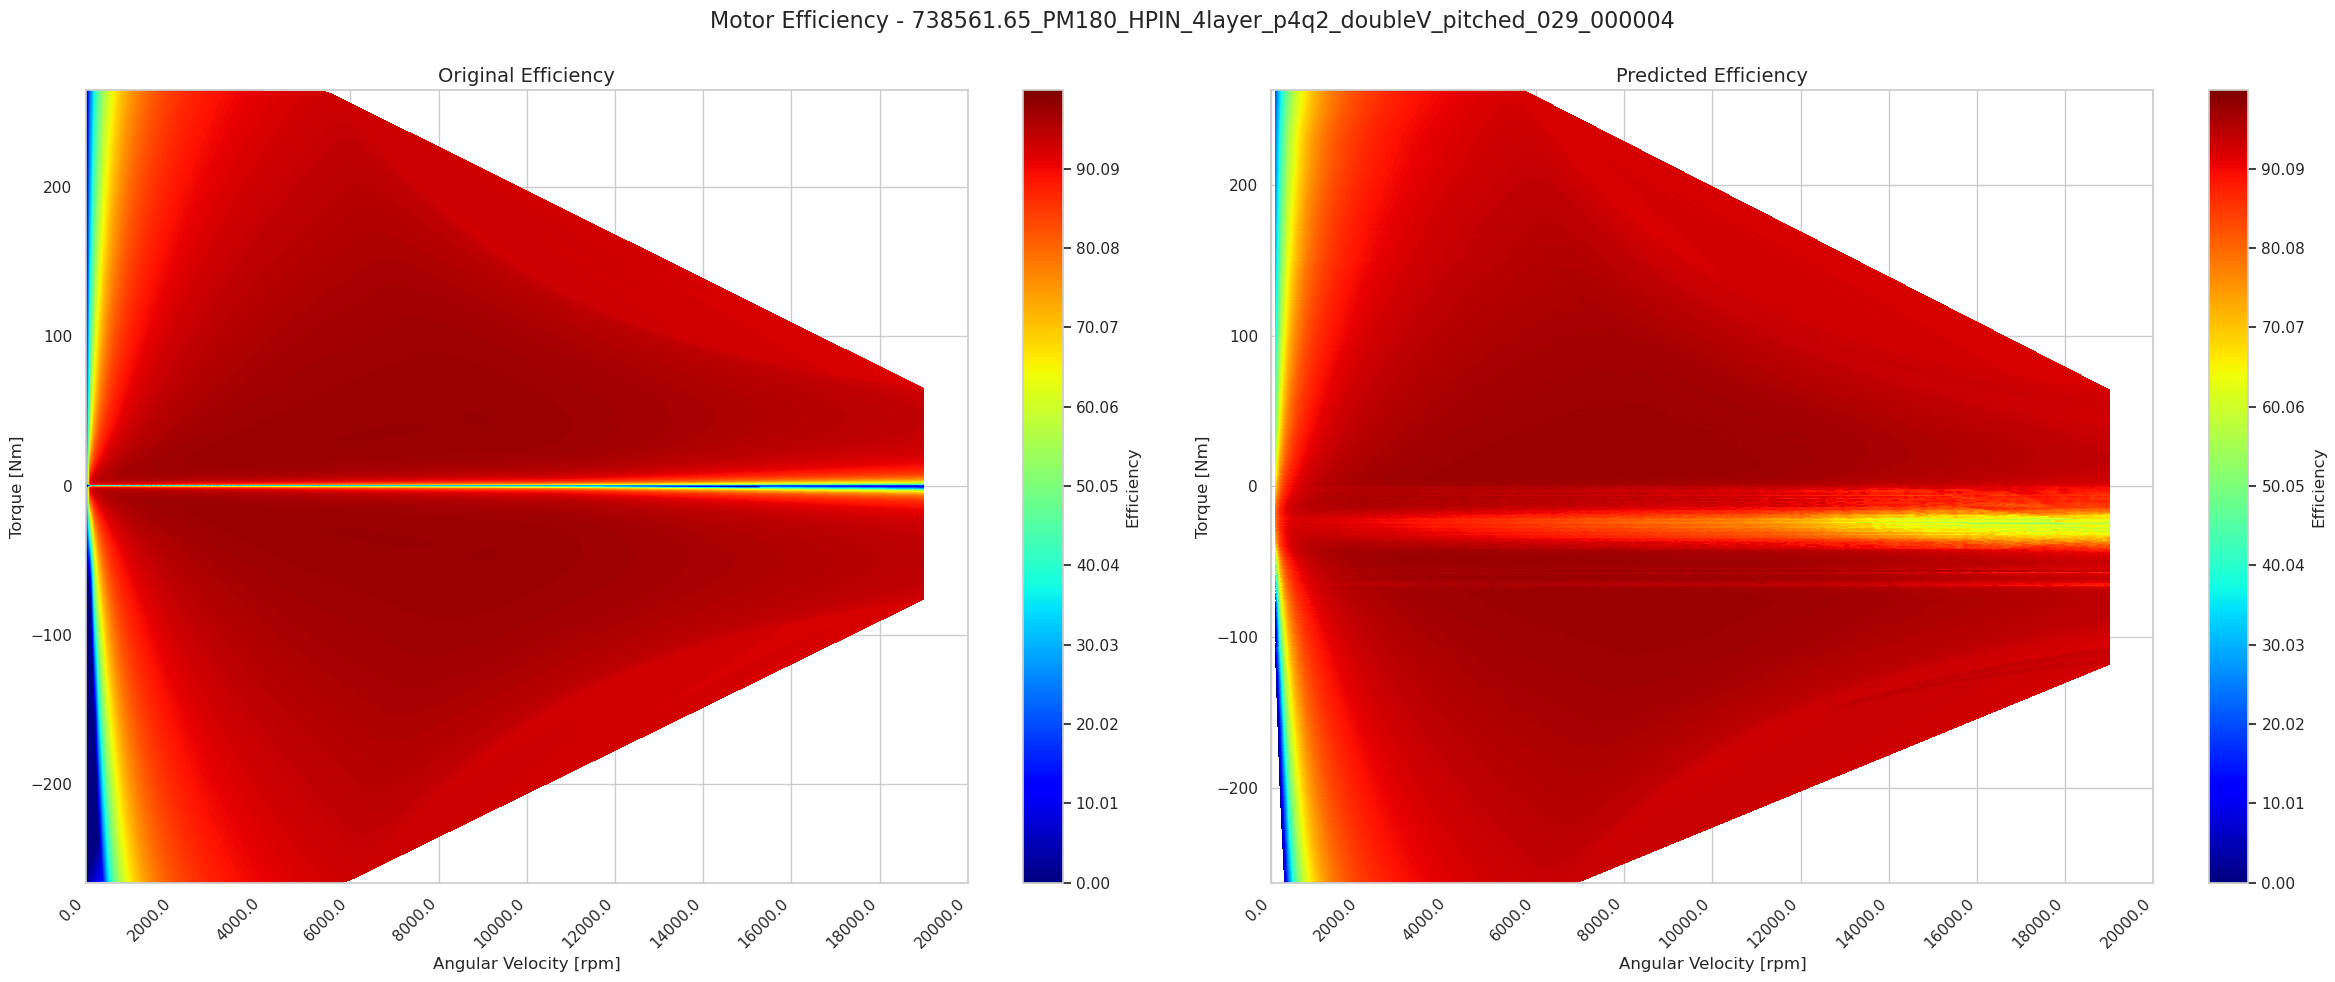

<Figure size 2400x2000 with 0 Axes>

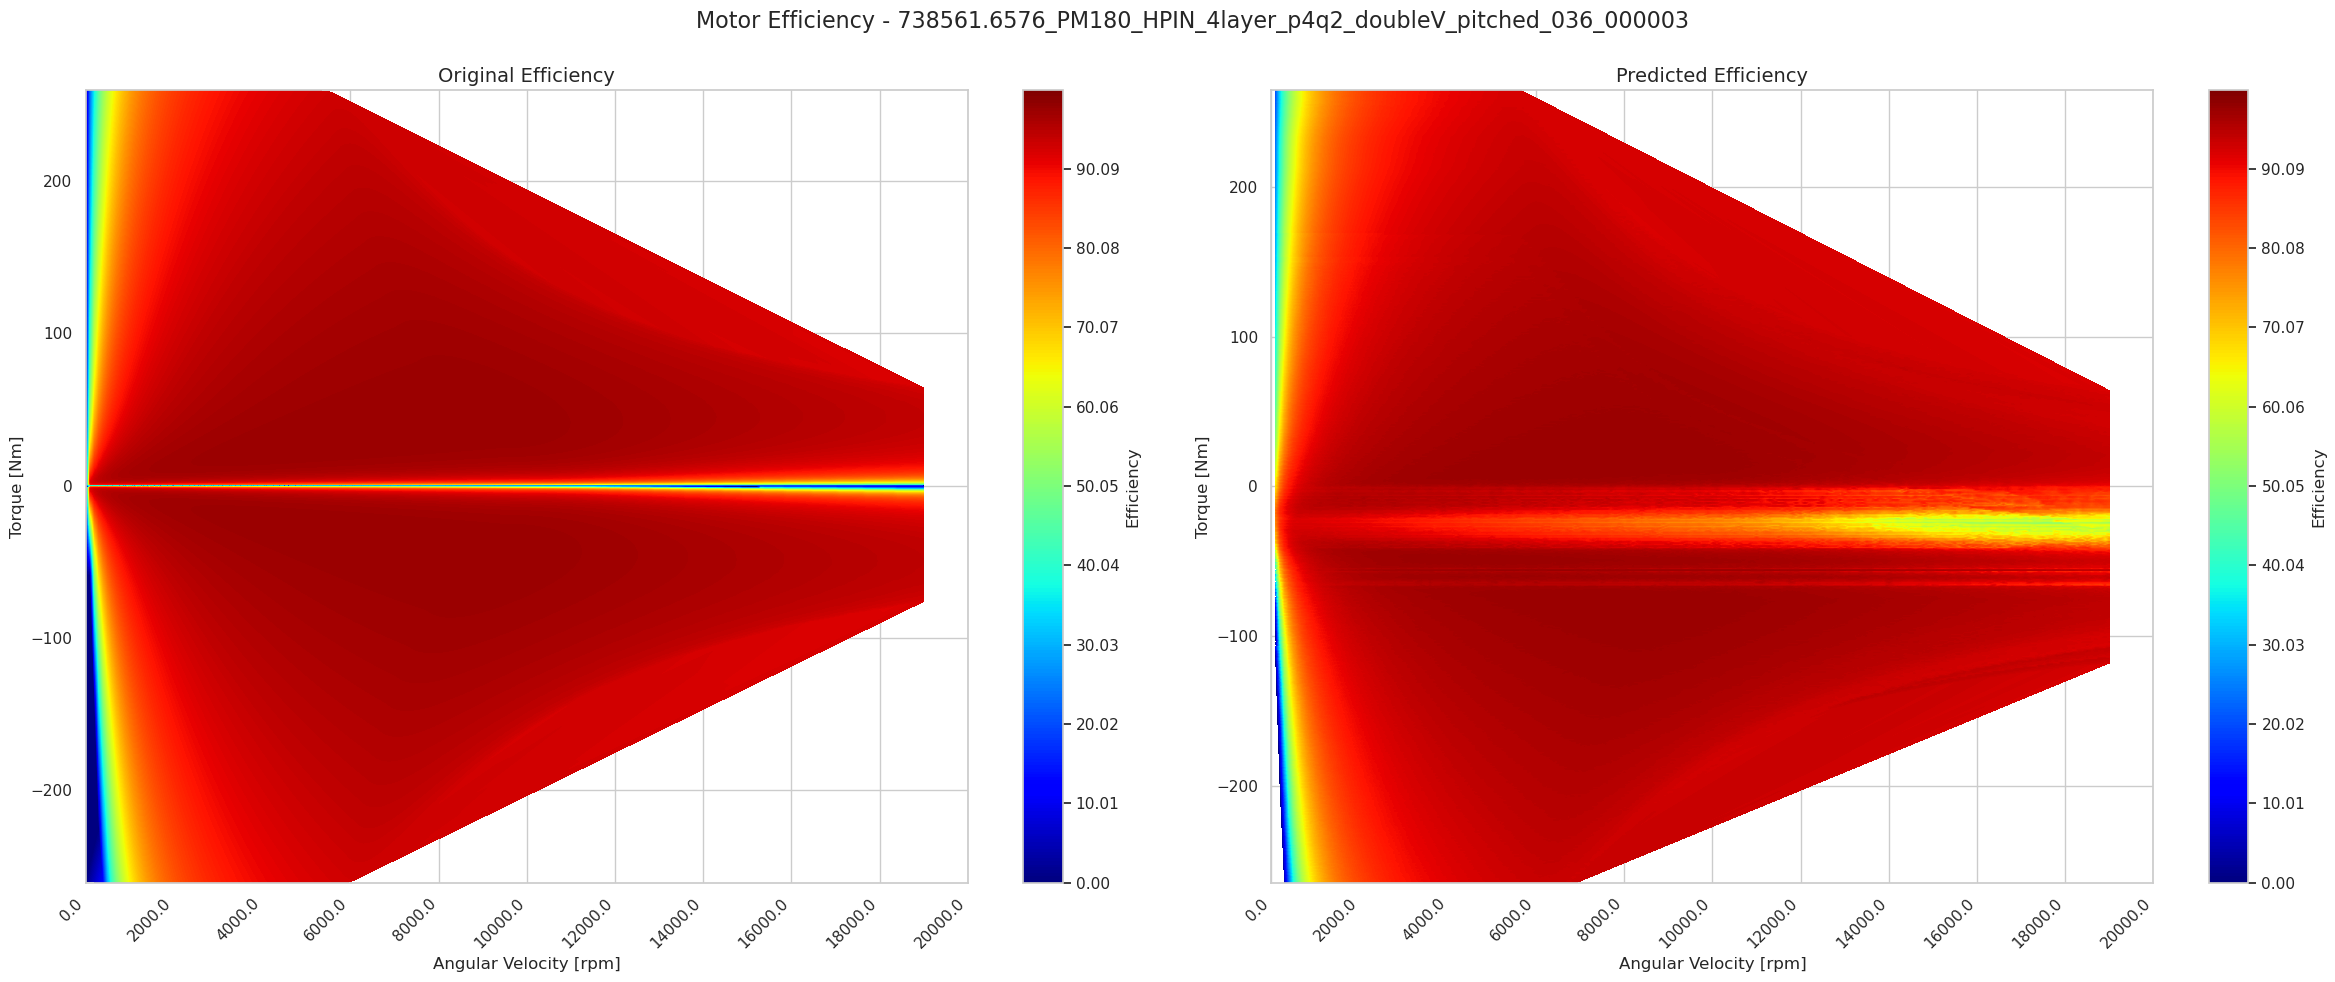

<Figure size 2400x2000 with 0 Axes>

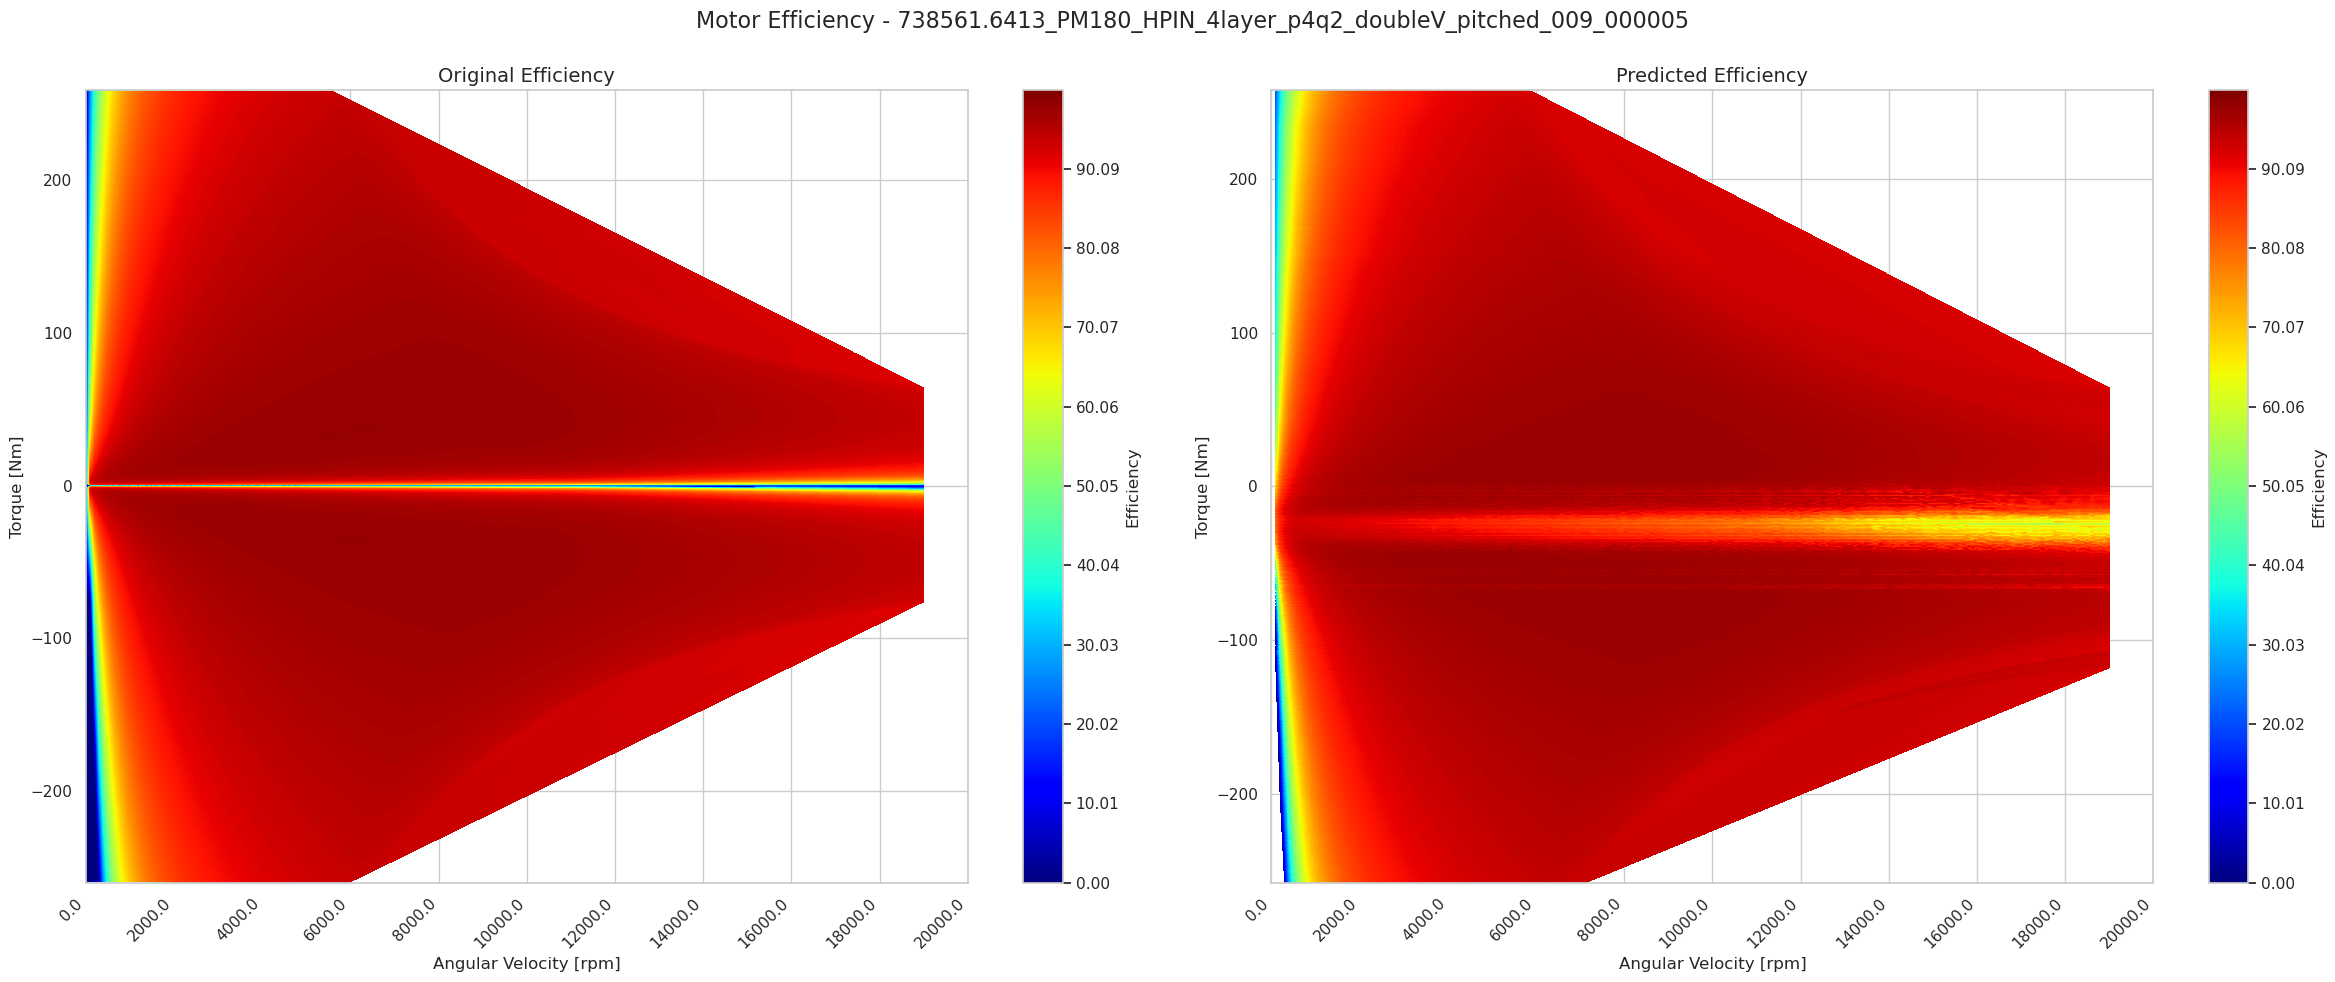

In [11]:
from src.utils import read_file_kpi3d, read_mm_nn
from src.inference import plot_kpi3d_dual
import numpy as np
import matplotlib.pyplot as plt

nn_kpi_2d = list(range(0, 19100, 100))
max_mgrenz_rounded = np.round(max_mgrenz).astype(int)
max_rows = (max_mgrenz_rounded * 2) + 1
nnkpi2darray = np.array(nn_kpi_2d)

max_index = 5

for index_no in range(max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'/home/k64889/Masters-Thesis/data/Testing/raw/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    mm_kpi3d = np.array(read_mm_nn(file_path, 'MM'))
    eta_kpi3d = read_file_kpi3d(file_path, 'ETA')
    
    eta_predicted = eta_matrix[index_no]
    mm_predicted = np.array(mm[index_no])
    
    # print(f"Sample {index_no}:")
    # print(f"Original ETA shape: {eta_kpi3d.shape}")
    # print(f"Predicted ETA shape: {eta_predicted.shape}")
    # print(f"Original MM shape: {mm_kpi3d.shape}")
    # print(f"Predicted MM shape: {mm_predicted.shape}")
    
    #Instead of creating a new figure for each plot, add to a grid
    plt.figure(figsize=(24, 20))  # Adjust figure size for all subplots

    # Plot the dual KPI 3D graph
    plot_kpi3d_dual(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted, filename_test)

plt.show()

<Figure size 2400x2000 with 0 Axes>

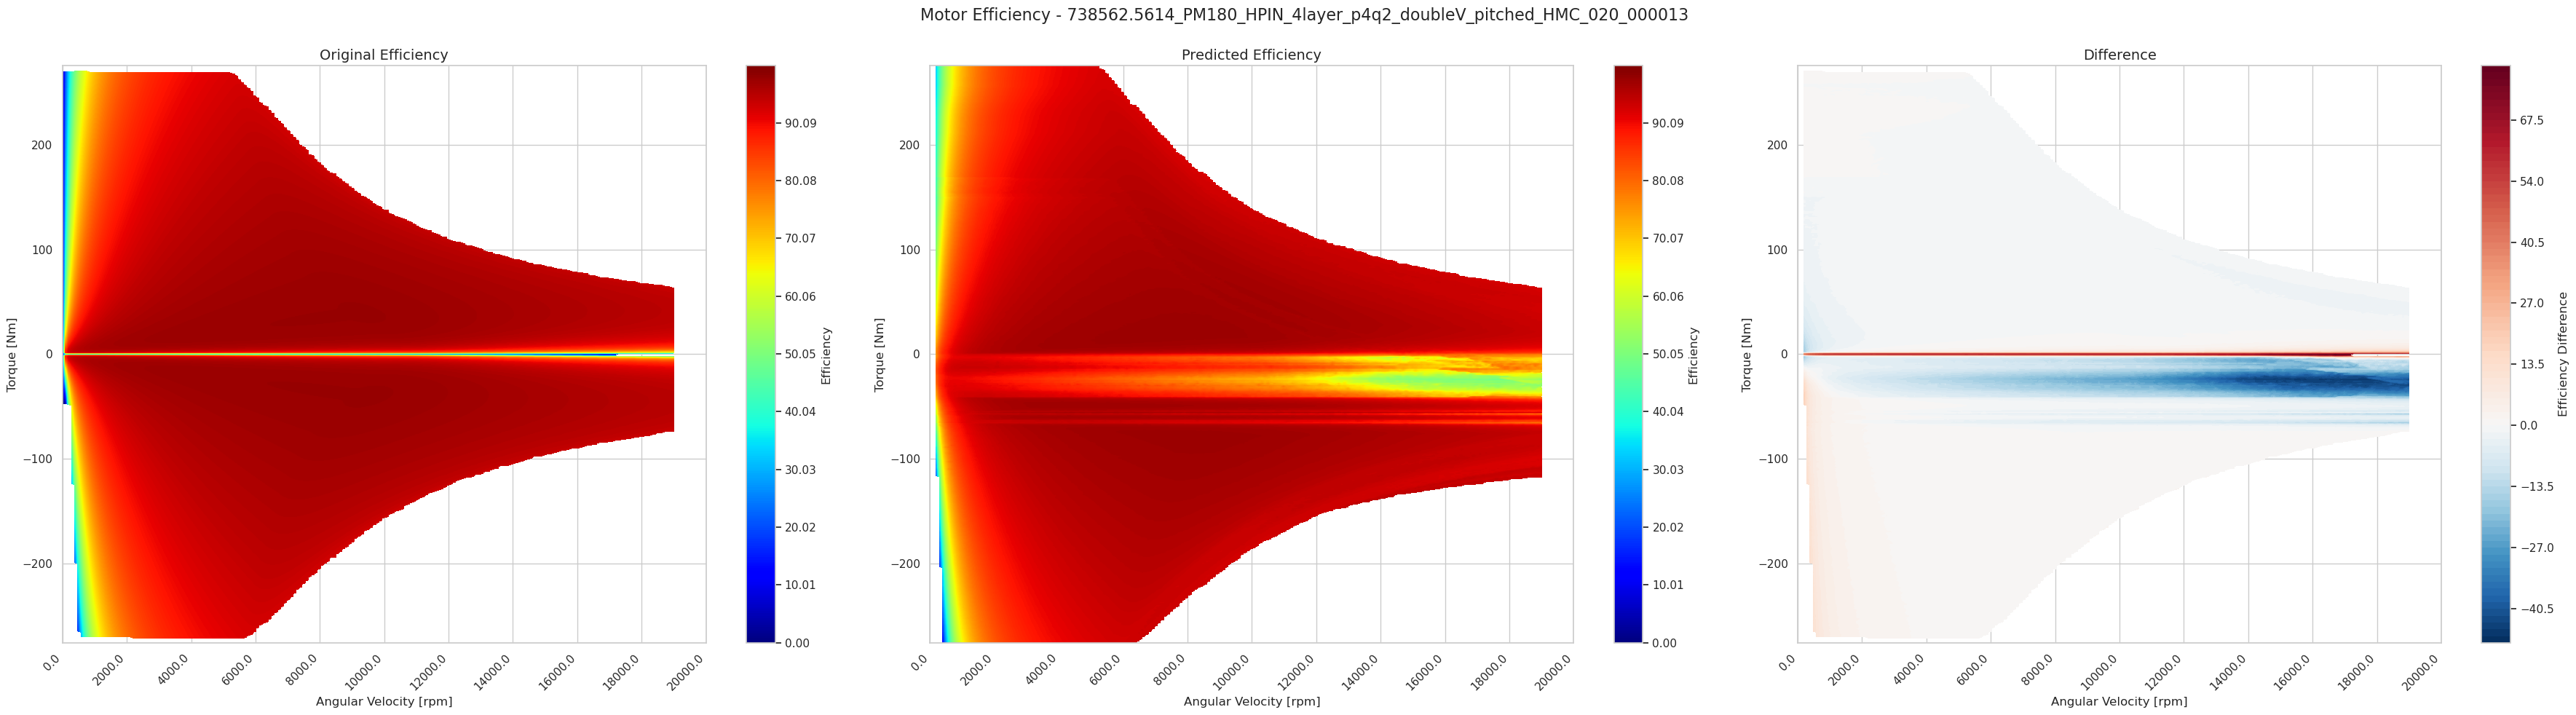

<Figure size 2400x2000 with 0 Axes>

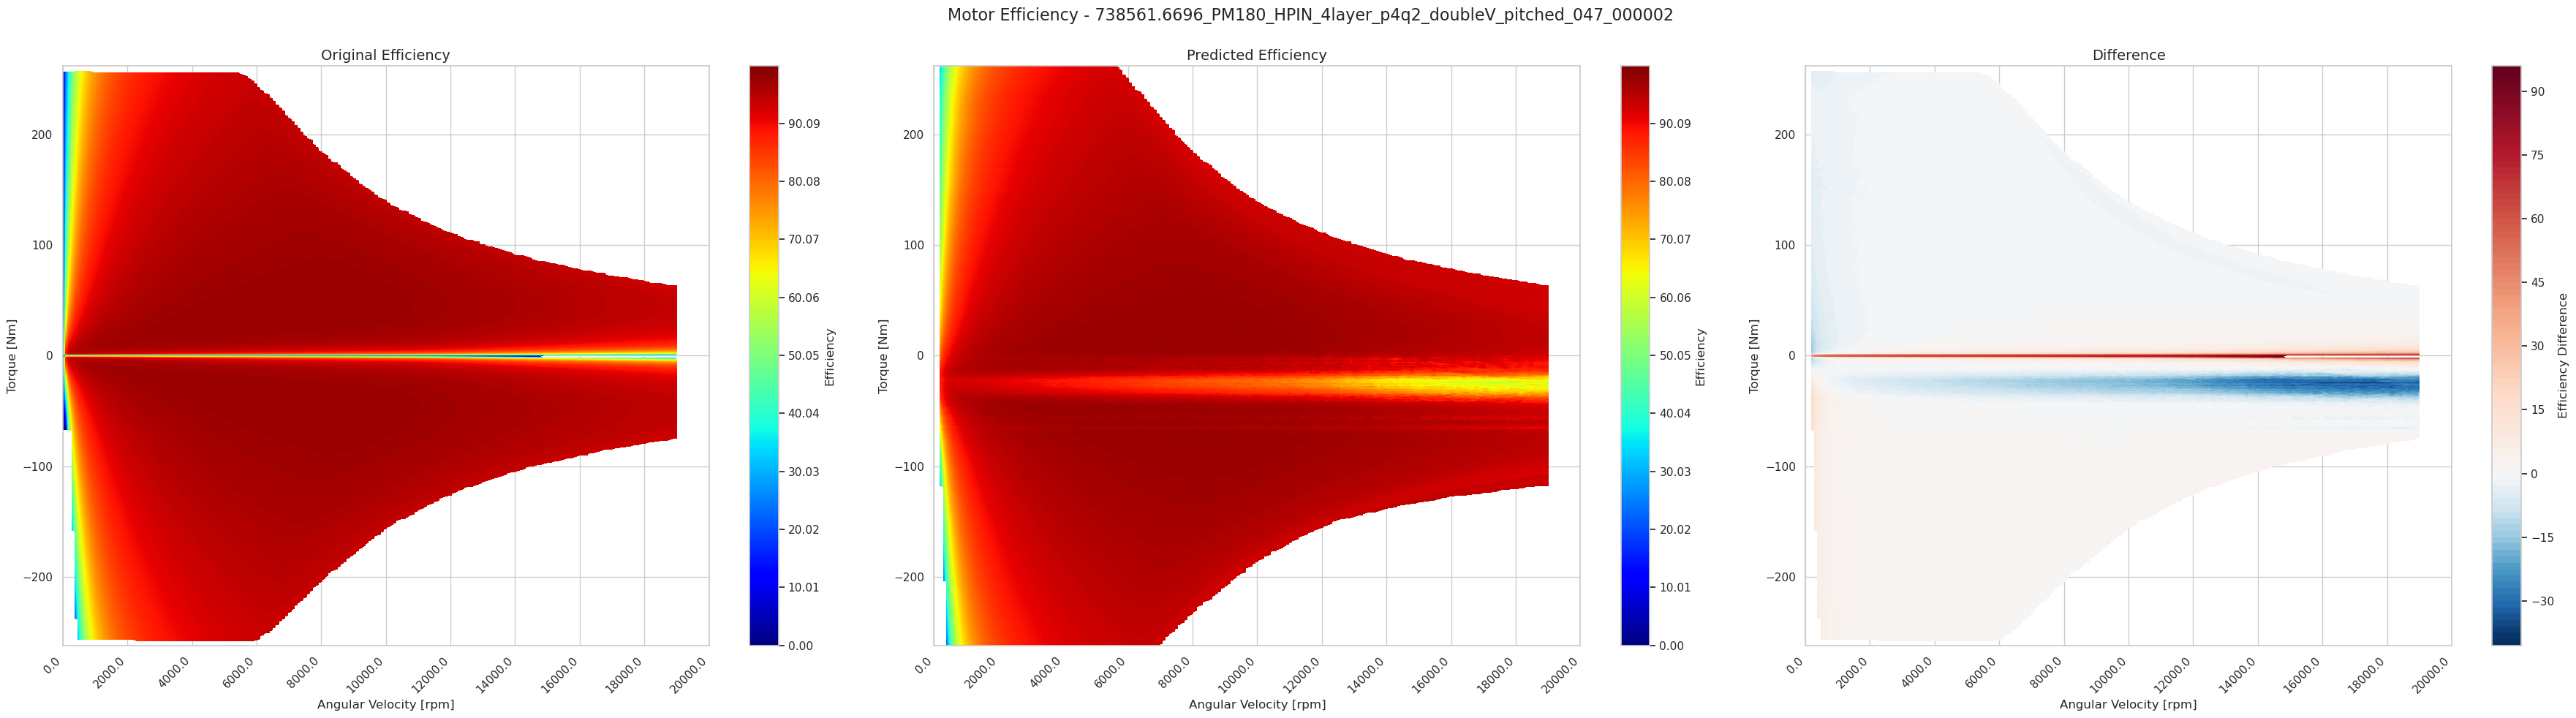

<Figure size 2400x2000 with 0 Axes>

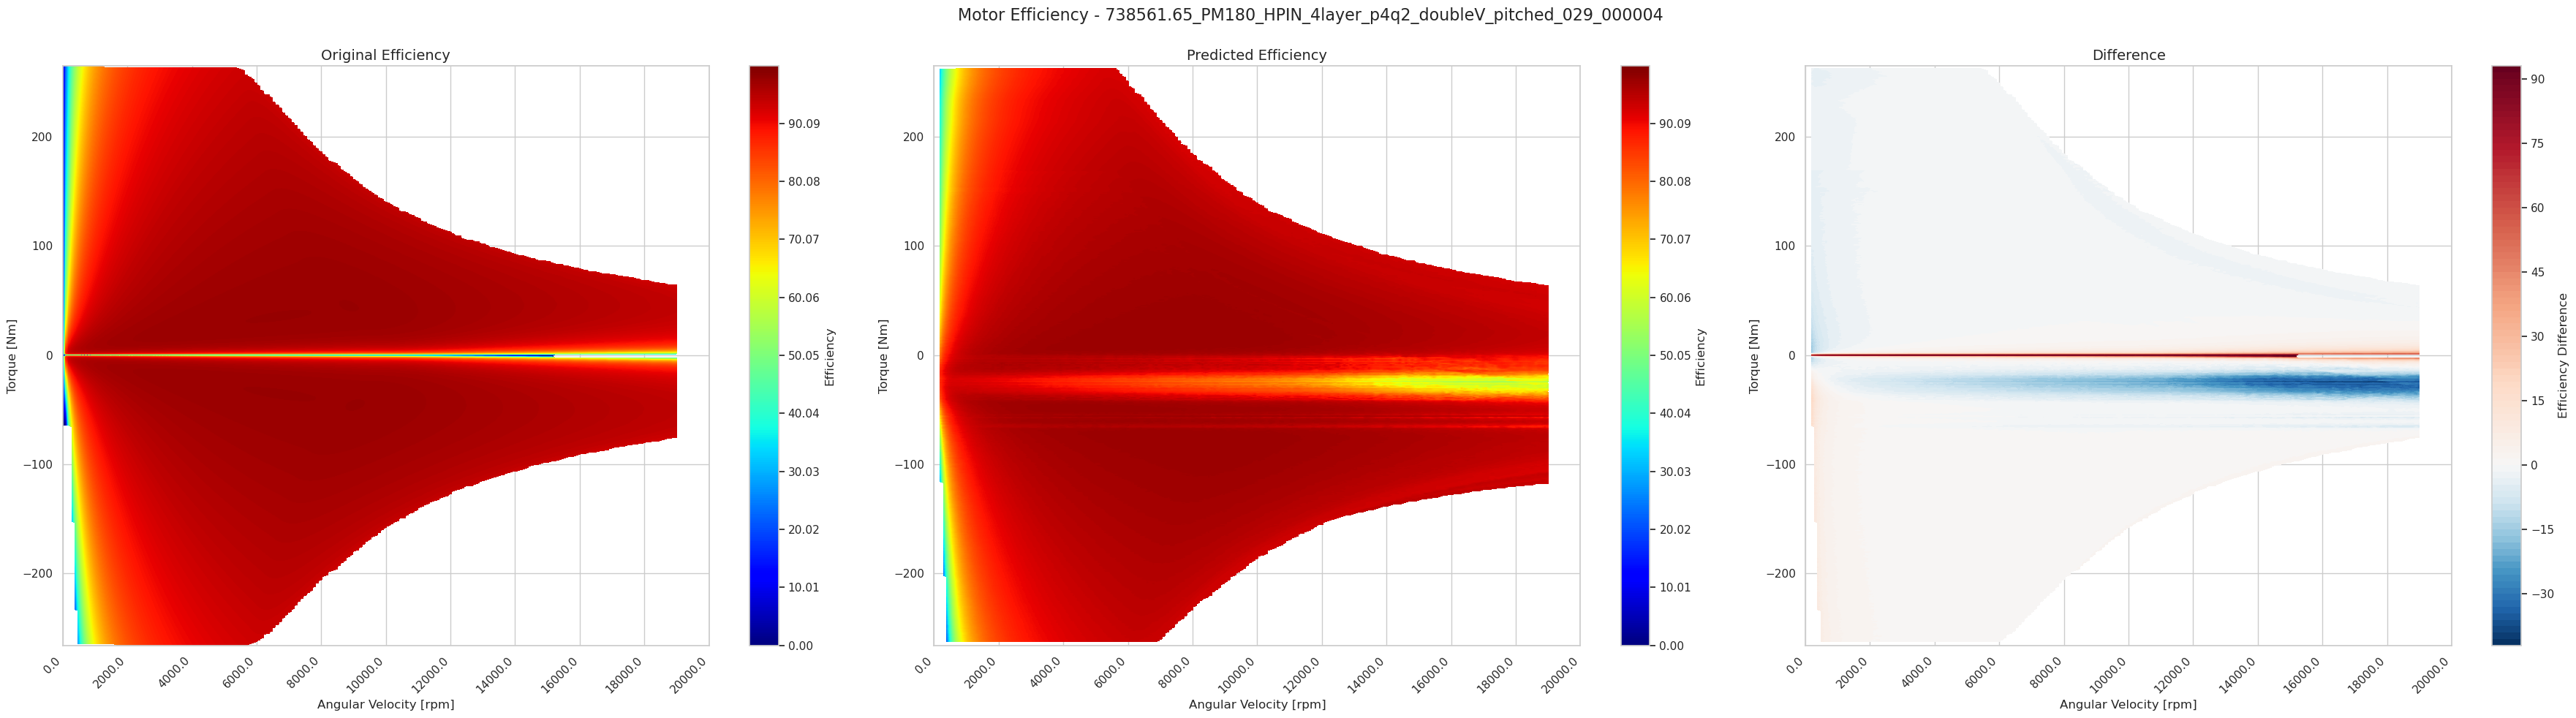

<Figure size 2400x2000 with 0 Axes>

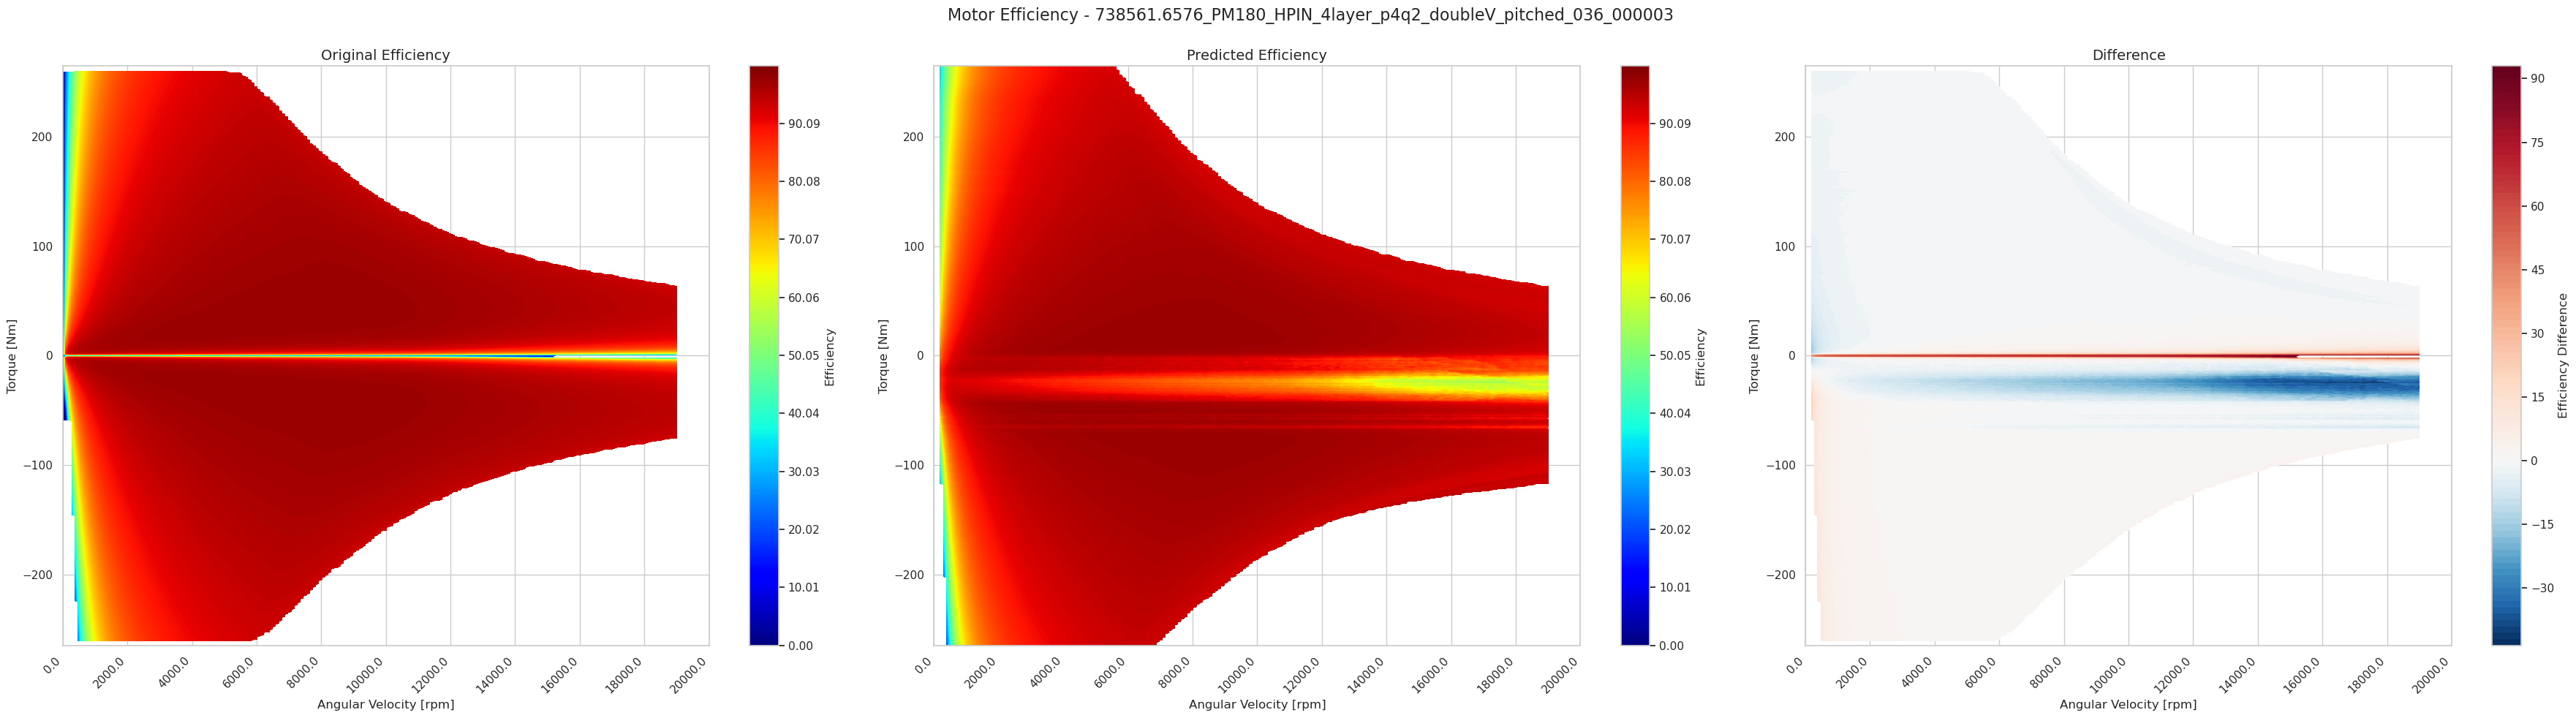

<Figure size 2400x2000 with 0 Axes>

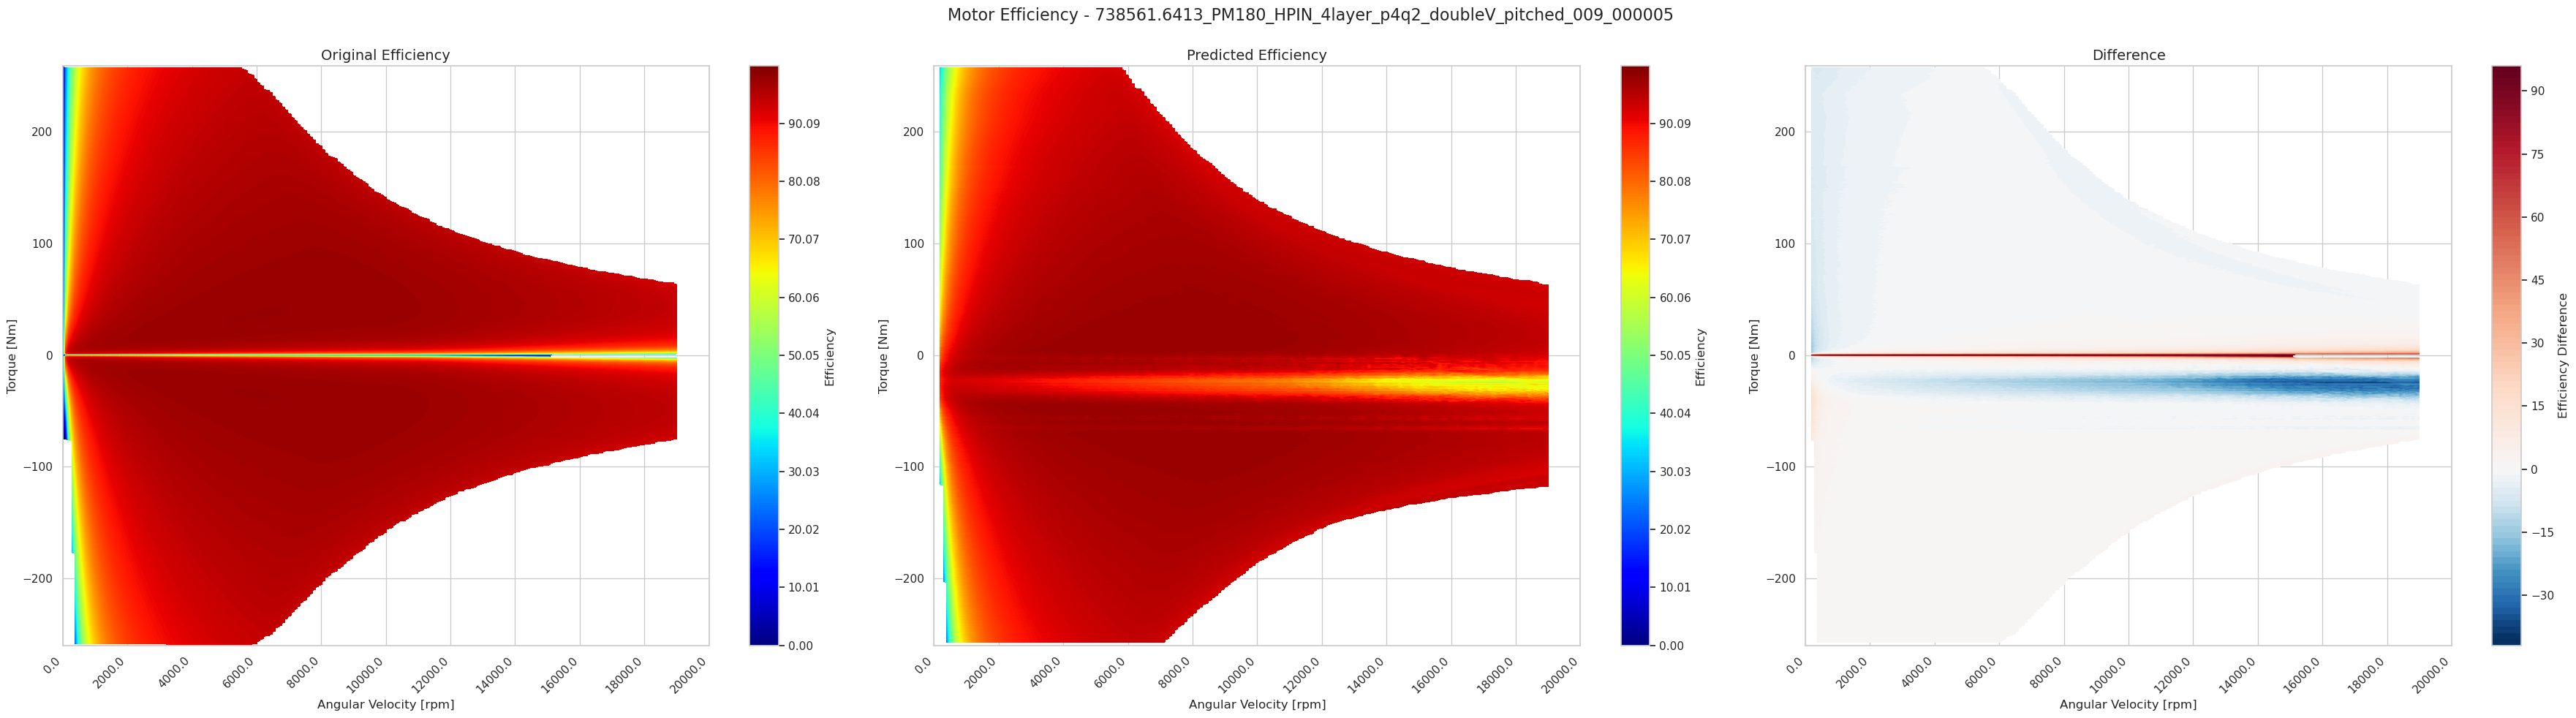

In [12]:
from src.utils import read_file_kpi3d, read_mm_nn
from src.inference import eval_plot_kpi3d
import numpy as np
import matplotlib.pyplot as plt

nn_kpi_2d = list(range(0, 19100, 100))
max_mgrenz_rounded = np.round(max_mgrenz).astype(int)
max_rows = (max_mgrenz_rounded * 2) + 1
nnkpi2darray = np.array(nn_kpi_2d)

max_index = 5

for index_no in range(max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'/home/k64889/Masters-Thesis/data/Testing/raw/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    #mm_kpi3d = read_file_kpi3d(file_path, 'MM')
    mm_kpi3d = np.array(read_mm_nn(file_path, 'MM'))
    eta_kpi3d = read_file_kpi3d(file_path, 'ETA')
    
    eta_predicted = np.array(eta_matrix[index_no])
    mm_predicted = mm[index_no]
    
    # print(f"Sample {index_no}:")
    # print(f"Original ETA shape: {eta_kpi3d.shape}")
    # print(f"Predicted ETA shape: {eta_predicted.shape}")
    
    #Instead of creating a new figure for each plot, add to a grid
    plt.figure(figsize=(24, 20))  # Adjust figure size for all subplots

    # Plot the dual KPI 3D graph
    eval_plot_kpi3d(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted, filename_test)

plt.show()

In [13]:
from src.utils import read_file_kpi3d, read_mm_nn
from src.inference import y2_score
import numpy as np
import matplotlib.pyplot as plt

nn_kpi_2d = list(range(0, 19100, 100))
#nn_kpi_2d = read_mm_nn(file_path, 'NN')
max_mgrenz_rounded = np.round(max_mgrenz).astype(int)
max_rows = (max_mgrenz_rounded * 2) + 1
nnkpi2darray = np.array(nn_kpi_2d)

score=0
max_index = 2

for index_no in range(max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'/home/k64889/Masters-Thesis/data/Testing/raw/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    mm_kpi3d = np.array(read_mm_nn(file_path, 'MM'))
    eta_kpi3d = read_file_kpi3d(file_path, 'ETA')
    
    eta_predicted = eta_matrix[index_no]
    mm_predicted = np.array(mm[index_no])
    
    # print(f"Sample {index_no}:")
    # print(f"Original ETA shape: {eta_kpi3d.shape}")
    # print(f"Predicted ETA shape: {eta_predicted.shape}")

    # Calculate the Y2 score
    score += y2_score(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted)
    
y2_score = score/max_index
print(f"Average Y2 Score: {y2_score:.4f}")

Sample 0:
Original ETA shape: (544, 191)
Predicted ETA shape: (553, 191)
Sample 1:
Original ETA shape: (516, 191)
Predicted ETA shape: (525, 191)
Average Y2 Score: 8.0339


In [14]:
print(df_test_inputs.index)

Index(['738562.5614_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_020_000013',
       '738561.6696_PM180_HPIN_4layer_p4q2_doubleV_pitched_047_000002',
       '738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitched_029_000004',
       '738561.6576_PM180_HPIN_4layer_p4q2_doubleV_pitched_036_000003',
       '738561.6413_PM180_HPIN_4layer_p4q2_doubleV_pitched_009_000005',
       '738561.7001_PM180_HPIN_4layer_p4q2_doubleV_pitched_074_000010',
       '738611.6026_PM180_HPIN_4layer_p4q2_doubleV_pitched_127_000001',
       '738562.5546_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_015_000010',
       '738561.6756_PM180_HPIN_4layer_p4q2_doubleV_pitched_052_000007',
       '738561.6858_PM180_HPIN_4layer_p4q2_doubleV_pitched_061_000010',
       '738561.6351_PM180_HPIN_4layer_p4q2_doubleV_pitched_003_000009',
       '738562.5587_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_018_000012',
       '738611.6013_PM180_HPIN_4layer_p4q2_doubleV_pitched_124_000006',
       '738611.6152_PM180_HPIN_4layer_p4q2_doubleV_pit

In [ ]:
a

In [15]:
# max_mgrenz=predictions_original_scale_y1[0].max()

Mgrenz is now taken from training data and MM not calculated coz predicted ETA grid can have only 1 size ie, max size but padded when size is not supposed to be equal

In [16]:
import numpy as np
nn_kpi_2d = list(range(0, 19100, 100))

max_mgrenz_rounded = np.round(max_mgrenz).astype(int)
max_rows=(max_mgrenz_rounded*2)+1

nnkpi2darray = np.array(nn_kpi_2d)
nn_kpi_2d_matrix = np.tile(nnkpi2darray, (max_rows, 1))

mm_values = np.arange(-max_mgrenz, max_mgrenz+1)
mm_kpi_2d_matrix = np.tile(mm_values.reshape(-1, 1), (1, 191))

In [17]:
index_no=10

In [18]:
eta_kpi_2d_matrix=predictions_original_scale_y2[0:index_no]
#eta_kpi_2d_matrix=predictions_original_scale_y2[index_no][:max_rows, :]

In [19]:
eta_kpi_2d_matrix.shape

(10, 561, 191)

In [20]:
from src.utils import plot_kpi3d

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

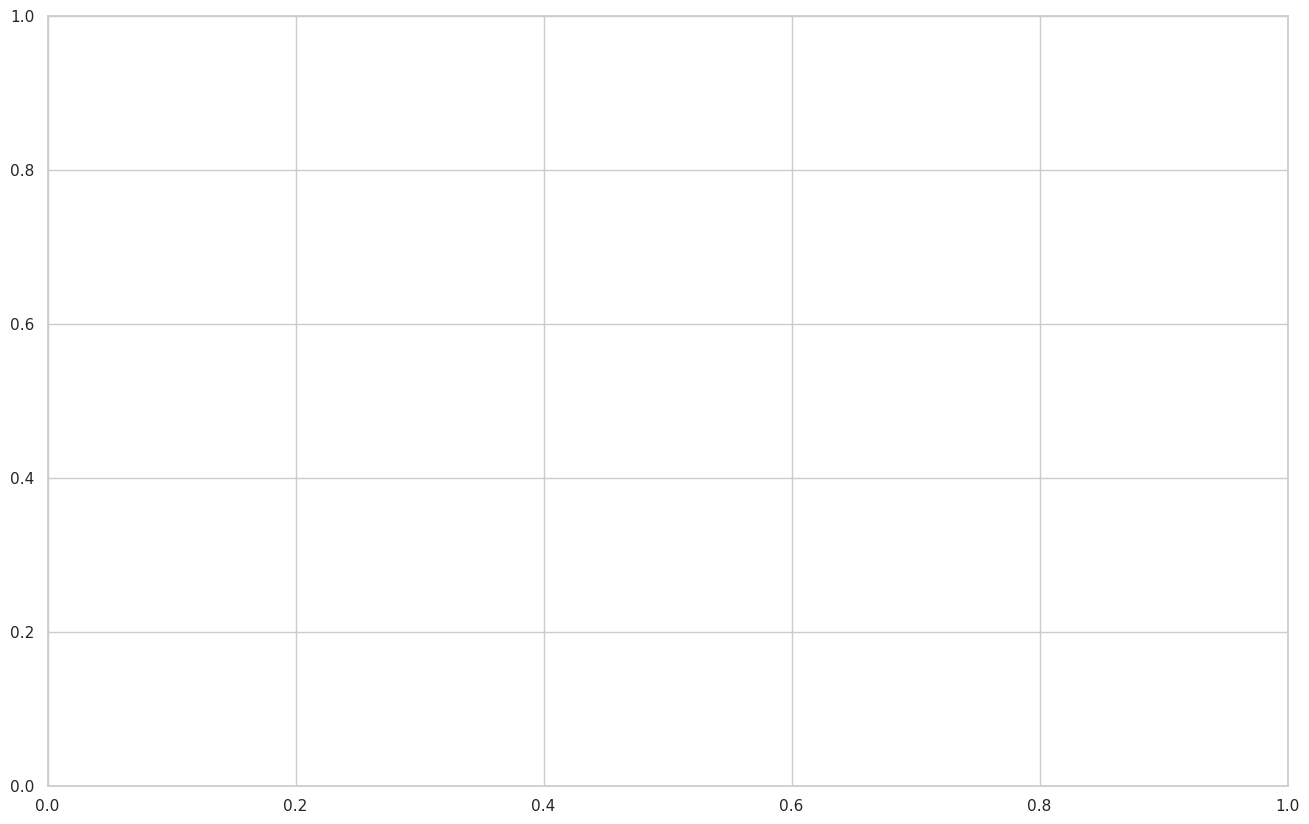

In [21]:
plot_kpi3d(nn_kpi_2d_matrix, mm_kpi_2d_matrix, eta_kpi_2d_matrix)

In [12]:
from src.utils import read_file_kpi3d, plot_kpi3d

In [13]:
filename_test=df_test_inputs.index[index_no]

In [14]:
filename_test

'738561.6351_PM180_HPIN_4layer_p4q2_doubleV_pitched_003_000009'

In [15]:
file_path = f'/home/k64889/Masters-Thesis/data/Testing/raw/{filename_test}.xlsx'

In [16]:
nn_kpi3d = read_file_kpi3d(file_path, 'NN')
mm_kpi3d = read_file_kpi3d(file_path, 'MM')
eta_kpi3d = read_file_kpi3d(file_path, 'ETA')

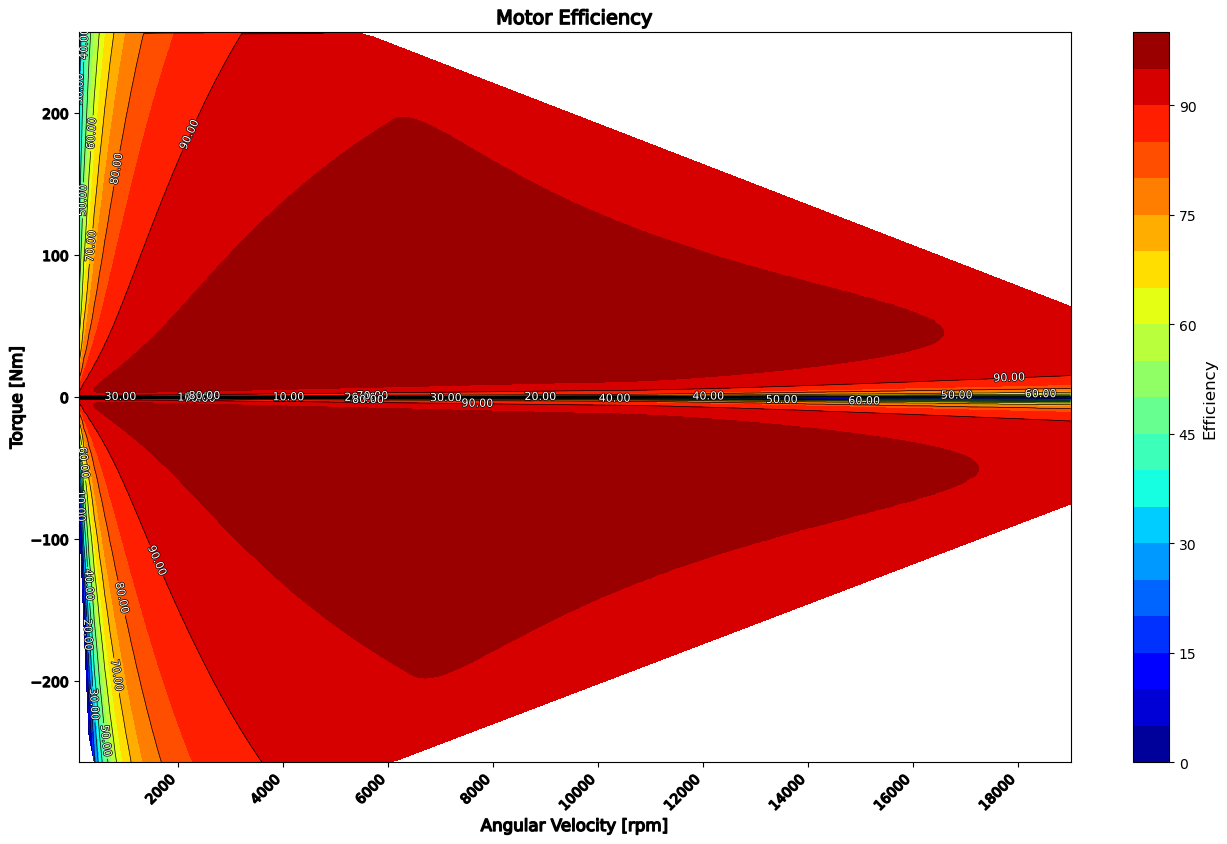

In [33]:
plot_kpi3d(nn_kpi3d, mm_kpi3d, eta_kpi3d)

KeyboardInterrupt: 

In [ ]:
plot_kpi3d_mean_std(nn, mm, eta_list_original, eta_list_predicted)

In [ ]:
from src.table_creation import create_tabular_data
import pandas as pd
import os

from tqdm import tqdm

directory = '/home/k64889/Masters-Thesis/data/temp'

df_test_inputs=pd.DataFrame()
df_test_y1_targets=pd.DataFrame()

for filename in tqdm(os.listdir(directory)):
    file_path = os.path.join(directory, filename)
    df_partial_inputs, df_partial_targets = create_tabular_data(file_path)
    
    if df_partial_inputs is not None:
        df_test_inputs = pd.concat([df_test_inputs, df_partial_inputs])
        
    if df_partial_targets is not None:
        df_test_y1_targets = pd.concat([df_test_y1_targets, df_partial_targets])
        